<a href="https://colab.research.google.com/github/Gh6if84vi/ML2024/blob/main/Project1(Module2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2:Appreciating,Interpreting and Visualizing Data

# **PROJECT**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

In [3]:
from google.colab import files
uploaded1=files.upload()
uploaded2=files.upload()

Saving heart.csv to heart.csv


Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [4]:
data=pd.read_csv("heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Data Preparation**

In [7]:
 ## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data["target"]=data["target"].replace({0:"No_disease",1:'Disease'})
data["sex"]=data["sex"].replace({1:"Male",0:"Female"})
data["cp"]=data.cp.replace({1:"typical_angina",2:"atypical_angina",3:"non_anginal_pain",4:"asymtomatic"})
data["exang"]=data.exang.replace({1:"Yes",0:"No"})
data["slope"]=data.slope.replace({1:"upsloping",2:"flat",3:"downsloping"})
data["thal"]=data.thal.replace({1:"fixed_defect",2:"reversable_defect",3:"normal"})
data.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non_anginal_pain,145,233,1,0,150,No,2.3,0,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,0,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,flat,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,flat,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,flat,0,reversable_defect,Disease
5,57,Male,0,140,192,0,1,148,No,0.4,upsloping,0,fixed_defect,Disease
6,56,Female,typical_angina,140,294,0,0,153,No,1.3,upsloping,0,reversable_defect,Disease


First,lets look at the differnce in the number of samples with and without disease using a barplot

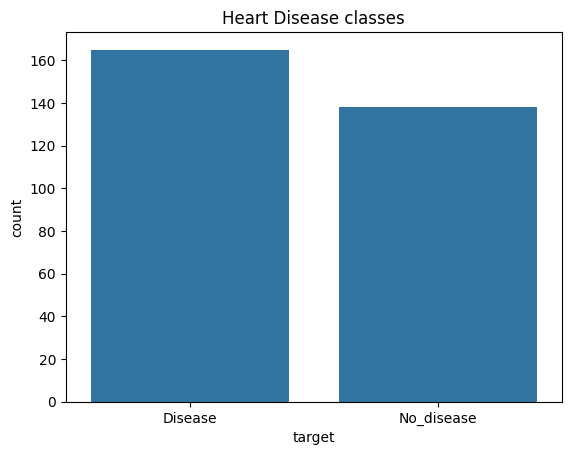

In [8]:
sns.countplot(x="target",data=data)
plt.title("Heart Disease classes")
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

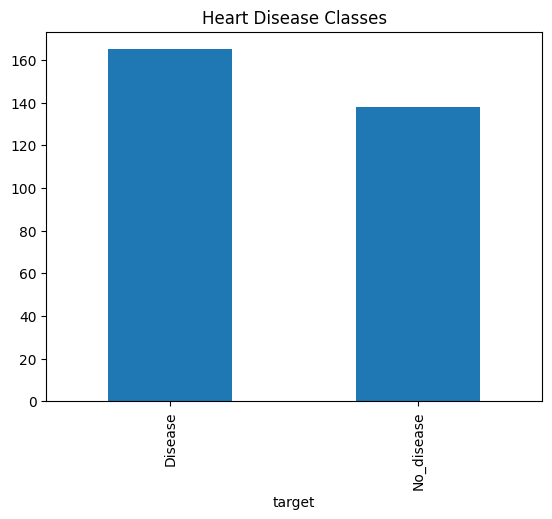

In [9]:
# we can plot the same barplots usng the pandas inbuilt plotting functions.
data["target"].value_counts().plot(kind="bar").set_title("Heart Disease Classes")

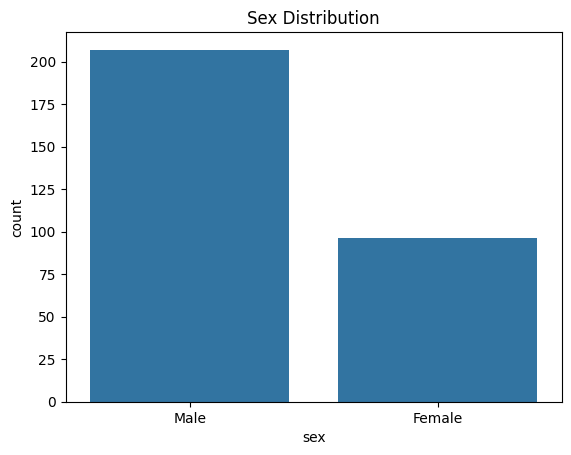

In [10]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do
sns.countplot(x="sex",data=data)
plt.title("Sex Distribution")
plt.show()

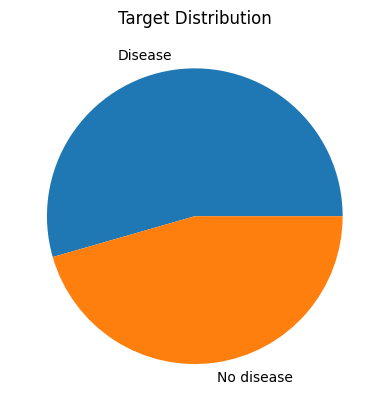

In [11]:
#usage of pie chart
plt.pie(data["target"].value_counts(),labels=["Disease","No disease"])
plt.title("Target Distribution")
plt.show()

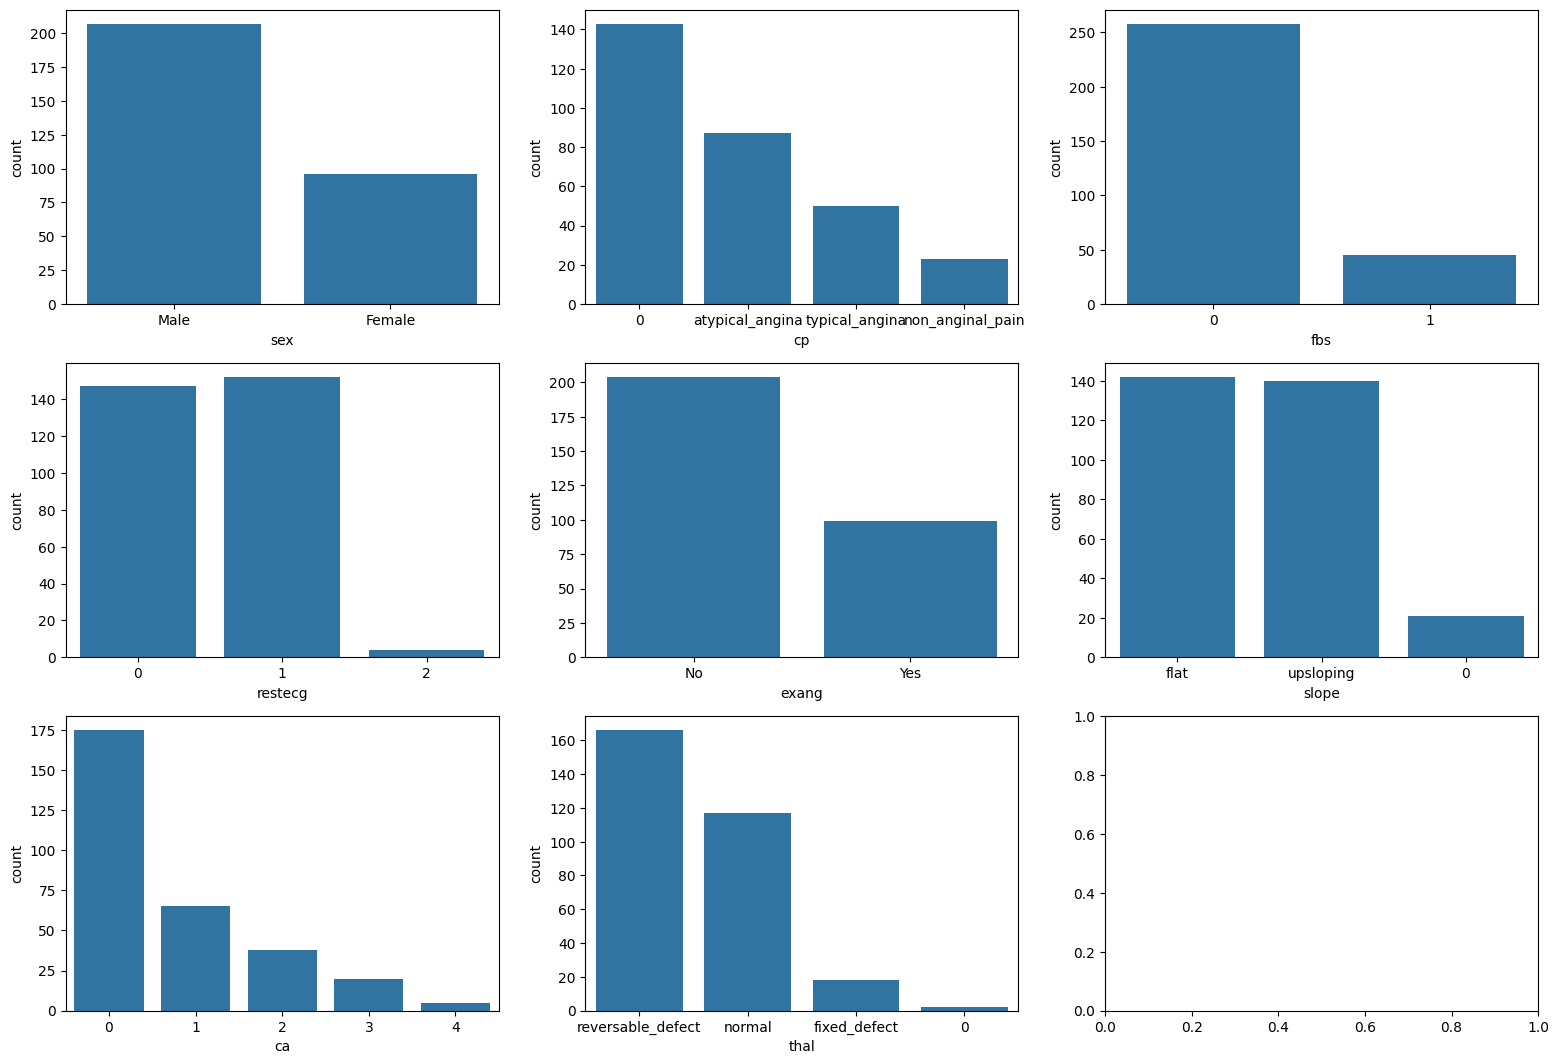

In [12]:
# Here we will plot the counts of all the non-continous features present in the dataset.
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(19,13))
cat_feat=["sex","cp","fbs","restecg","exang","slope","ca","thal"]
for idx,feature in enumerate(cat_feat):
  ax=axes[int(idx/3),idx%3]
  sns.barplot(data[feature].value_counts(),ax=ax)


Text(0.5, 1.0, 'Disease classes accordingto Chest Pain')

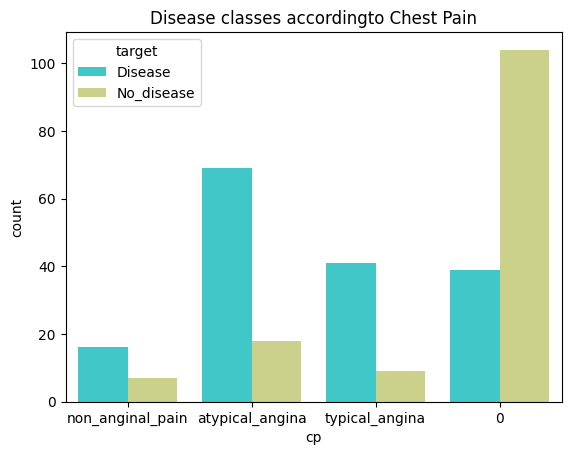

In [13]:
##  now lets play with 2 variables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x="cp",hue="target",data=data,palette="rainbow").set_title('Disease classes accordingto Chest Pain')


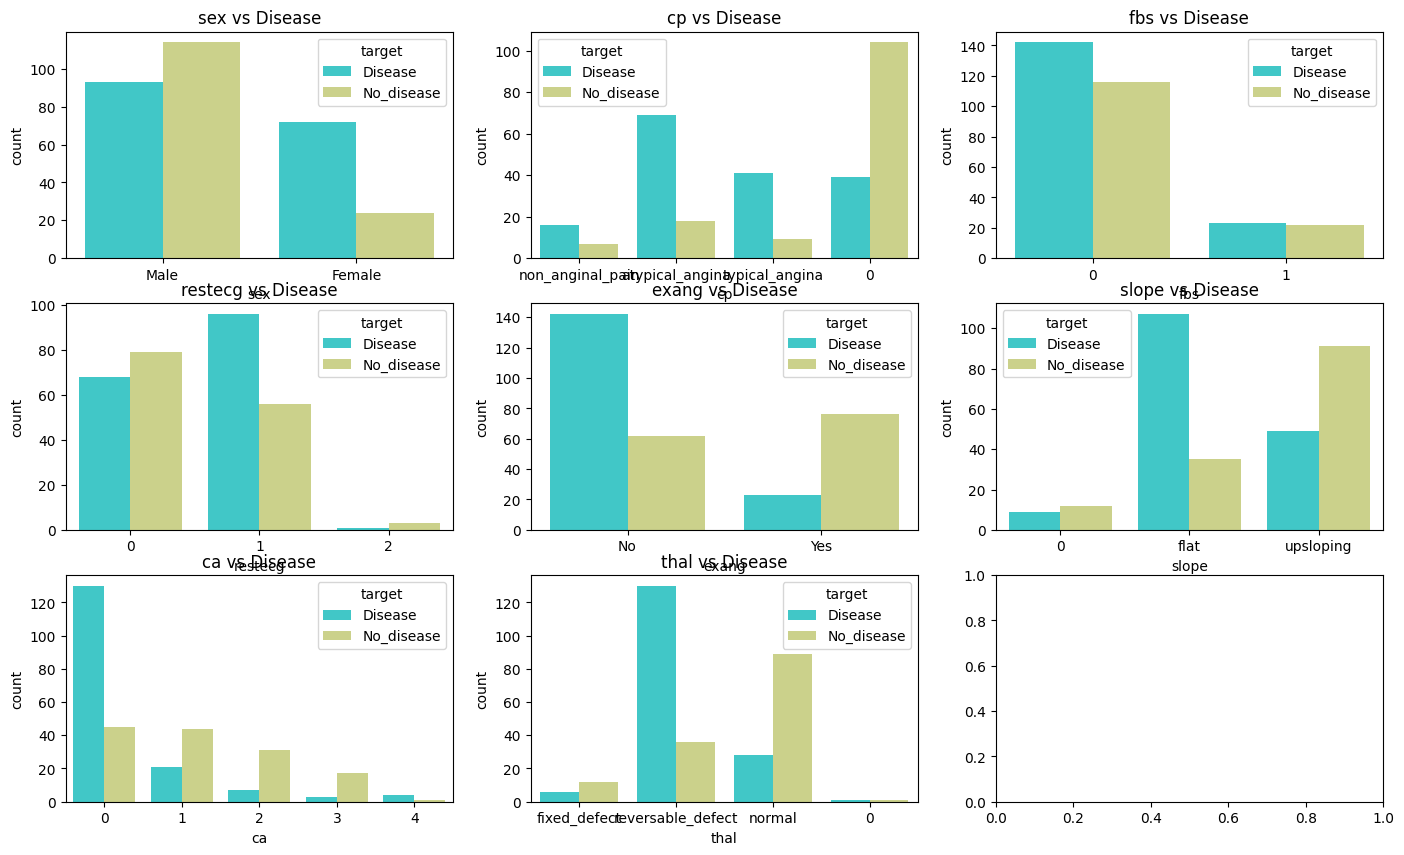

In [14]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for idx,feature in enumerate(cat_feat):
  ax=axes[int(idx/3),idx%3]
  sns.countplot(x=feature,hue="target",palette="rainbow",data=data,ax=ax).set_title(f"{feature} vs Disease")

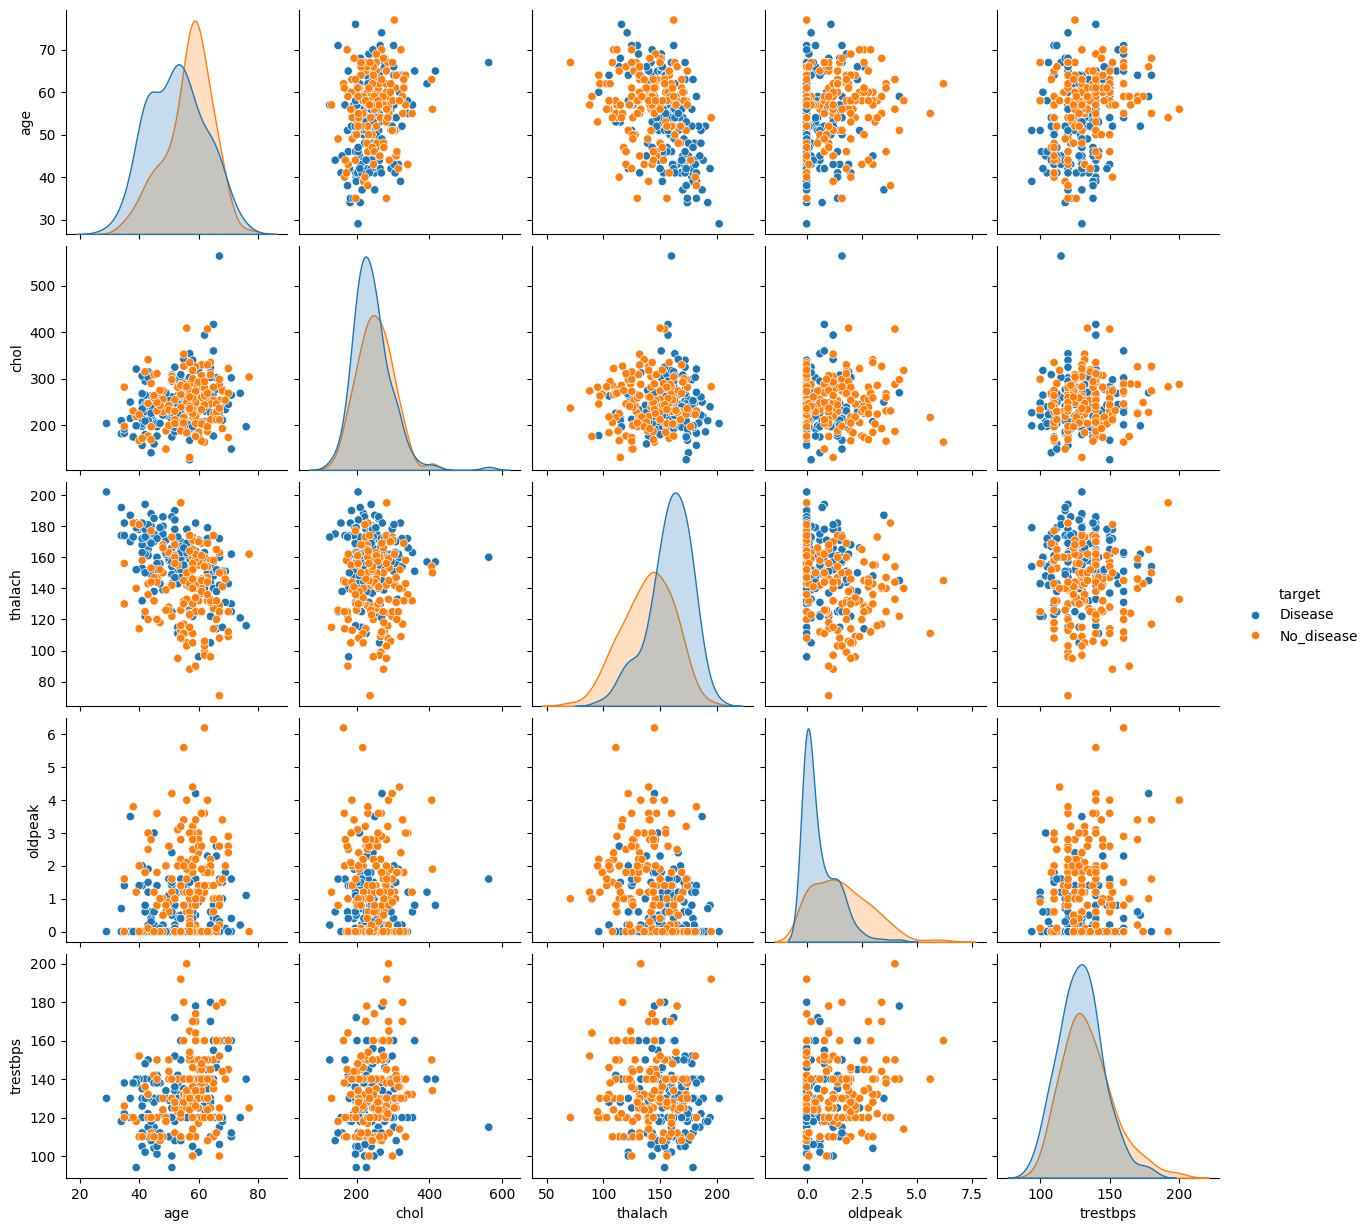

In [15]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features=['age','chol','thalach','oldpeak','trestbps']
sns.pairplot(data[continous_features+['target']],hue='target')

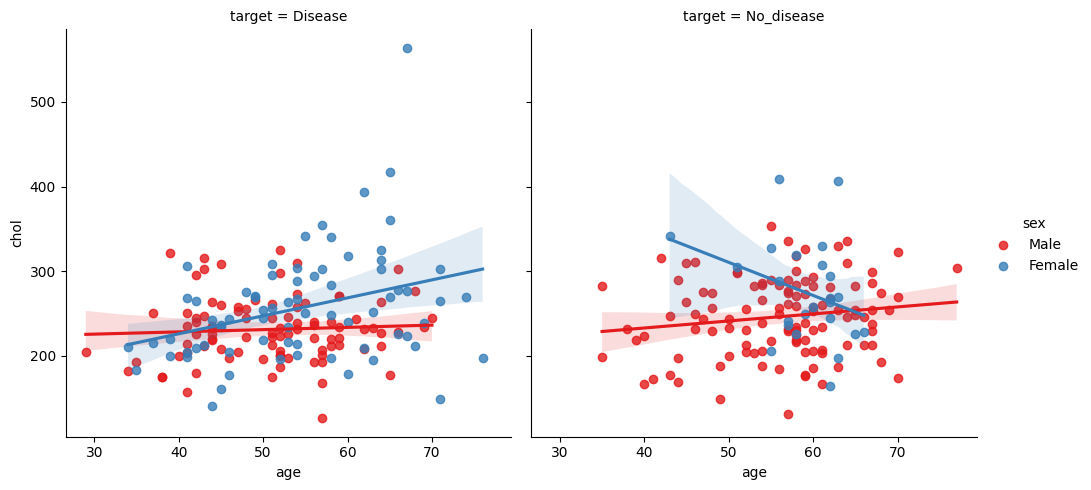

In [16]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

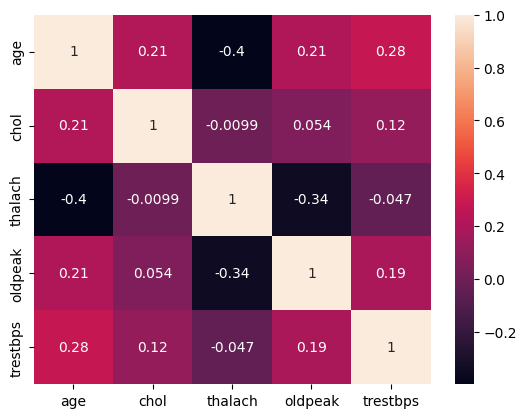

In [17]:
numeric_data=data[continous_features]
corr_matrix=numeric_data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()


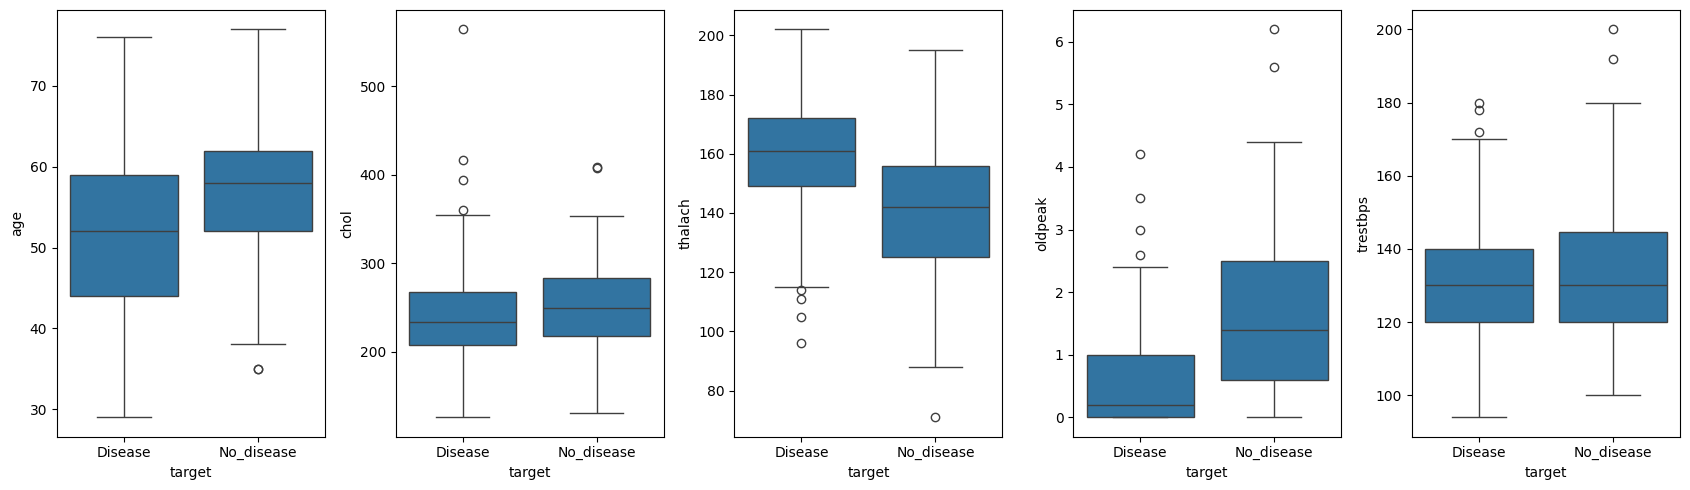

In [18]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(17, 5), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

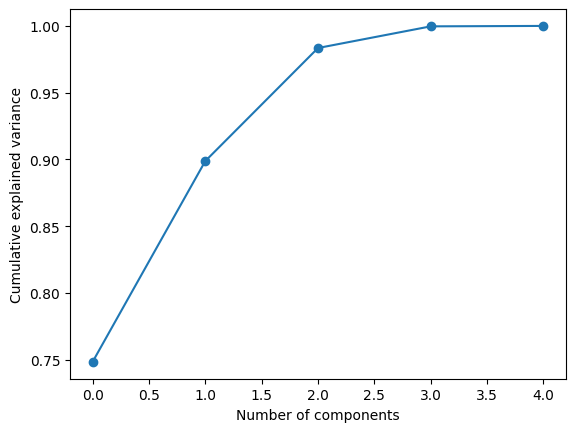

In [19]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal componentsimport matplotlib/
import matplotlib.pyplot as plt
import numpy as np
pca=PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

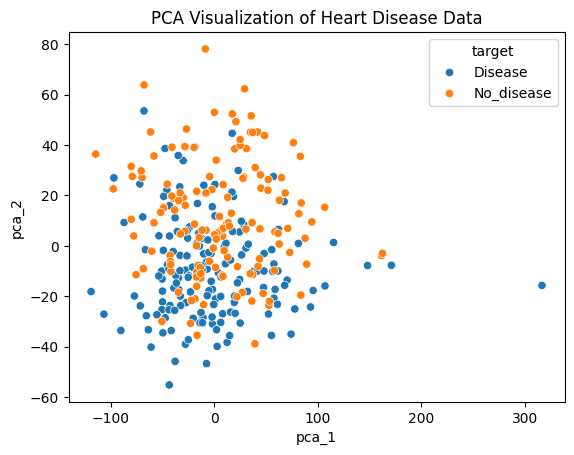

In [20]:
pca=PCA(n_components=2)
pca.fit(numeric_data)
pca_data=pca.transform(numeric_data)
#create a DataFrame with the principal components and target labels
pca_df=pd.DataFrame({
    "pca_1":pca_data[:,0],
    "pca_2":pca_data[:,1],
    "target":data["target"]

})
#visualizing the PCA results with a scatter plot
sns.scatterplot(x="pca_1",y="pca_2",hue="target",data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()

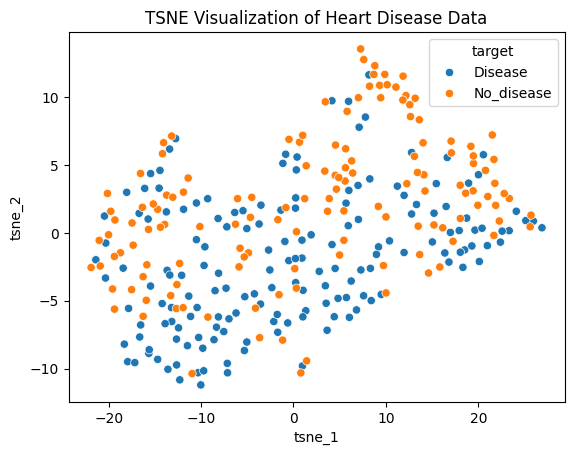

In [21]:
from sklearn.manifold import TSNE
#Intialixing and fit the TSNE model
tsne=TSNE(n_components=2)
tsne_df=tsne.fit_transform(numeric_data)
tsne_df=pd.DataFrame({
    "tsne_1":tsne_df[:,0],
    "tsne_2":tsne_df[:,1],
    "target":data["target"]
})
sns.scatterplot(x="tsne_1",y="tsne_2",hue="target",data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()

# **Based on the plots above, answer the following questions:**

1.what is the percenatge of samples with Disease?

In [22]:
total_samples=len(pca_df)
samples_with_disese=len(pca_df[pca_df["target"]==1])
percentage_with_disease=(samples_with_disese/total_samples)*100
print(f"The percenatge of samples with Disease is {percentage_with_disease} ")

The percenatge of samples with Disease is 0.0 


2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?

In [23]:
from scipy.stats import ttest_ind
continous_features=['age','chol','thalach','oldpeak','trestbps']
disease_samples=data[data["target"]==1]
No_disease_samples=data[data["target"]==0]
#perform t-tests for each continuous feature
significant_features=[]
for feature in continous_features:
  t_stat,p_value=ttest_ind(disease_samples[feature],No_disease_samples[feature])
  if p_value<0.05:
    significant_features.append((feature,p_value))
significant_features.sort(key=lambda x:x[1])
top_3_significant_features = significant_features[:3]

print("Top 3 continuous features with significant statistical differences:")

for feature, p_value in top_3_significant_features:
    print("Top 3 continuous features with significant statistical differences:")
    print(f"{feature}: p-value = {p_value:.5f}")


Top 3 continuous features with significant statistical differences:


3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?

      **Answer** is no,neither tsne not pca showing clear separation

4. What is the optimal number of principal components in our case?

        **optimal no.of prinicipal components are 4**


5. what are the continous features with the highest correation with each other?

In [24]:
corr_matrix=data[continous_features].corr()
print("Correalition matrix")
print(corr_matrix)
abs_corr_matrix=corr_matrix.abs()
for i in range(len(continous_features)):
  abs_corr_matrix.iloc[i,i]=0
max_corr_value=abs_corr_matrix.max().max()
max_corr_pair=abs_corr_matrix.stack().idxmax()
print(f"The pair of features with the highest correlation are: {max_corr_pair}")
print(f"The correlation value is: {max_corr_value:.5f}")

Correalition matrix
               age      chol   thalach   oldpeak  trestbps
age       1.000000  0.213678 -0.398522  0.210013  0.279351
chol      0.213678  1.000000 -0.009940  0.053952  0.123174
thalach  -0.398522 -0.009940  1.000000 -0.344187 -0.046698
oldpeak   0.210013  0.053952 -0.344187  1.000000  0.193216
trestbps  0.279351  0.123174 -0.046698  0.193216  1.000000
The pair of features with the highest correlation are: ('age', 'thalach')
The correlation value is: 0.39852




---



Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [60]:

upload2=files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded (2).csv


In [61]:
data=pd.read_csv('star_nutri_expanded.csv')
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [62]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [63]:
data['Total Fat (g)'].unique()


array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [71]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [ ]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [65]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [66]:
data['Tea']=data['Beverage_category'].apply(lambda x:1 if x=='Tazo® Tea Drinks' else 0)
data=data.drop('Beverage_category',axis=1)

In [67]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [68]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [69]:
data=data.replace({True:1,False:0})

In [72]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-72-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [73]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

In [76]:
data['Tea']

,Tea
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


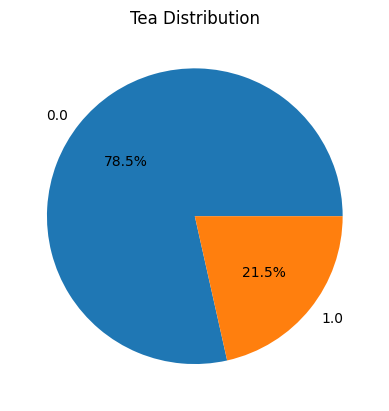

In [75]:
## Create a pie chart of the 'Tea' column also write your observation form the plot
tea_counts=data['Tea'].value_counts()
plt.pie(tea_counts,labels=tea_counts.index,autopct='%1.1f%%')
plt.title('Tea Distribution')
plt.show()

Obseravtion is Tea is no as preffered when compared to other Beverages

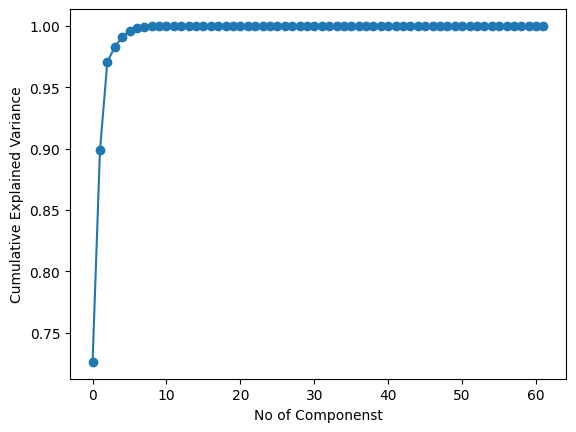

In [77]:
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
pca=PCA()
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker="o")
plt.xlabel('No of Componenst')
plt.ylabel('Cumulative explained variance')
plt.show()



Optimal no.of components we be around 10

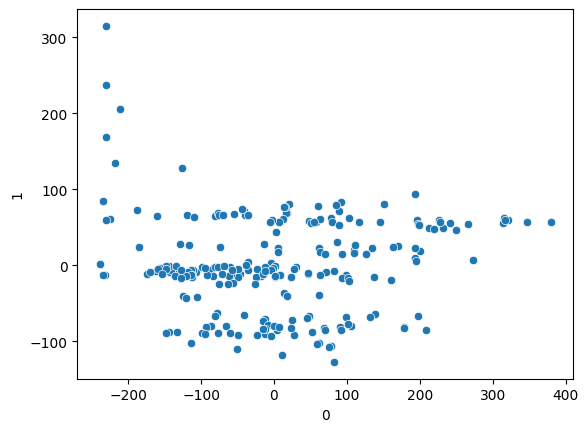

In [80]:
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# data_scaled=scaler.fit_transform(data)
pca=PCA(n_components=13)
pca.fit(data)
pca_data=pca.transform(data)
pca_df=pd.DataFrame({

})



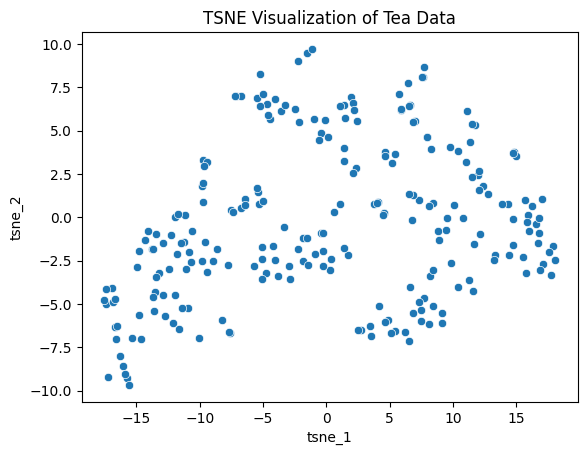

In [85]:
# plot the first 2 components of tsne, whats you observation from the plot?
tsne=TSNE(n_components=2)
tsne_data=tsne.fit_transform(data)
tsne_df=pd.DataFrame({
    "tsne_1":tsne_data[:,0],
    "tsne_2":tsne_data[:,1],

})
sns.scatterplot(x="tsne_1",y="tsne_2",data=tsne_df)
plt.title("TSNE Visualization of Tea Data")
plt.show()

some observations from the plot:

1.Clusters: The data points form distinct clusters. Each cluster likely represents a group of data points that are similar to each other in the high-dimensional space.

2.Separation: The clusters are well-separated, which suggests that the t-SNE algorithm has effectively captured the local and global structure of the data. This indicates that the underlying classes or groups in the high-dimensional space are distinguishable.

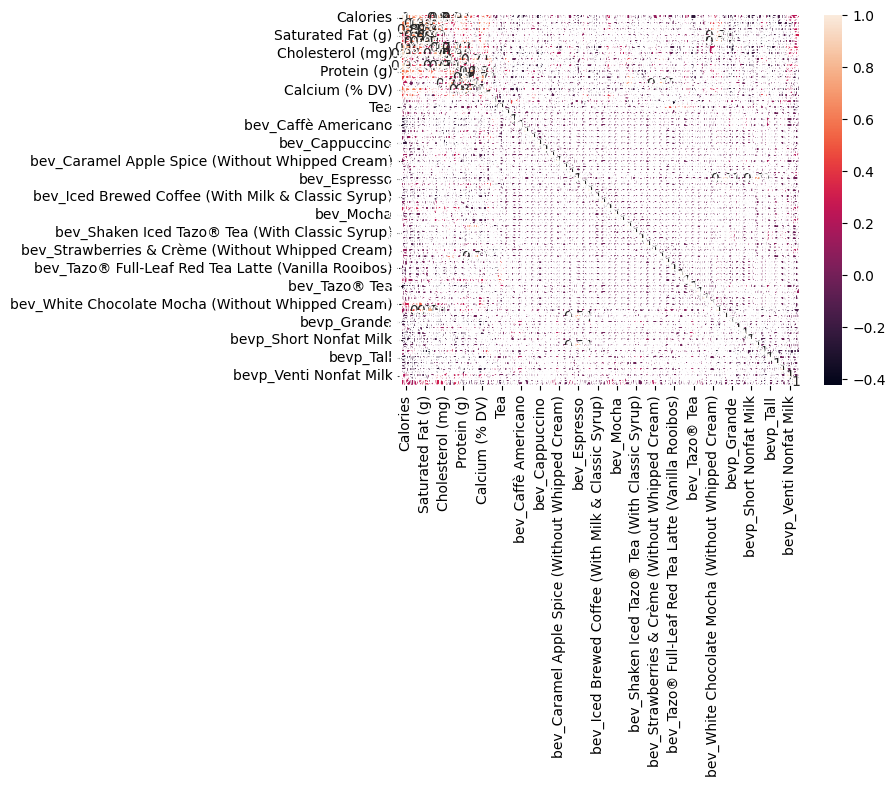

In [88]:
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()
#

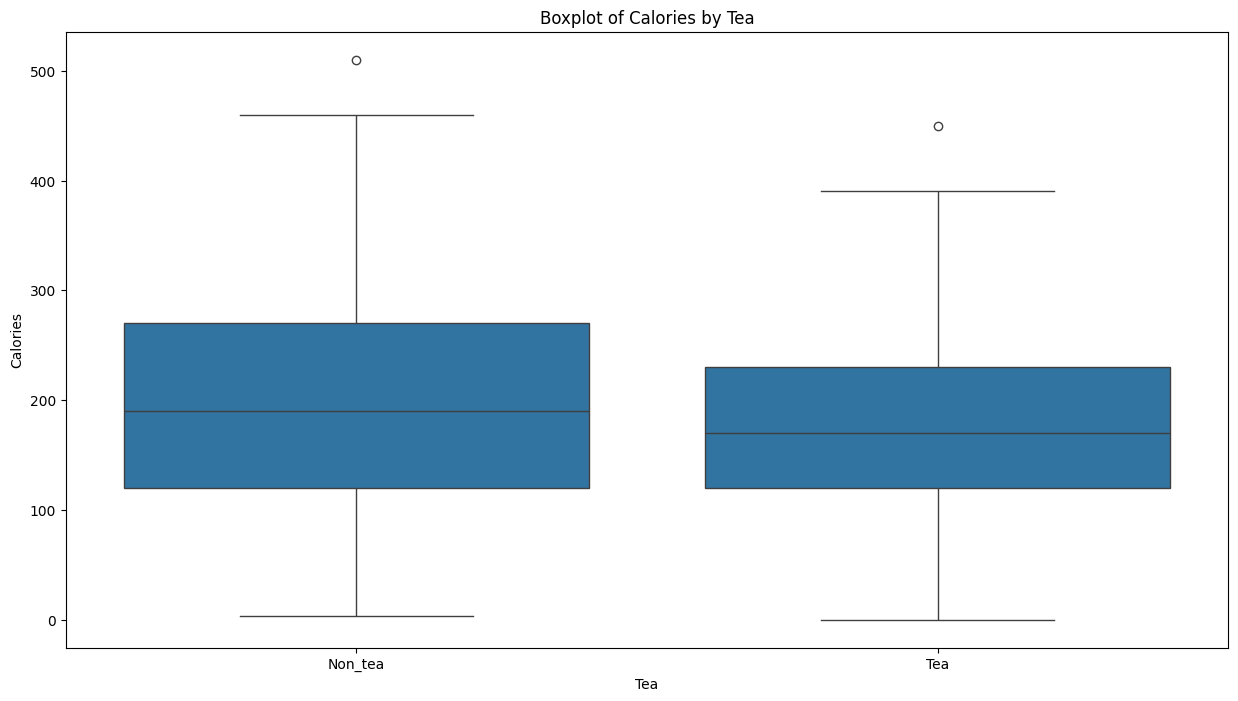

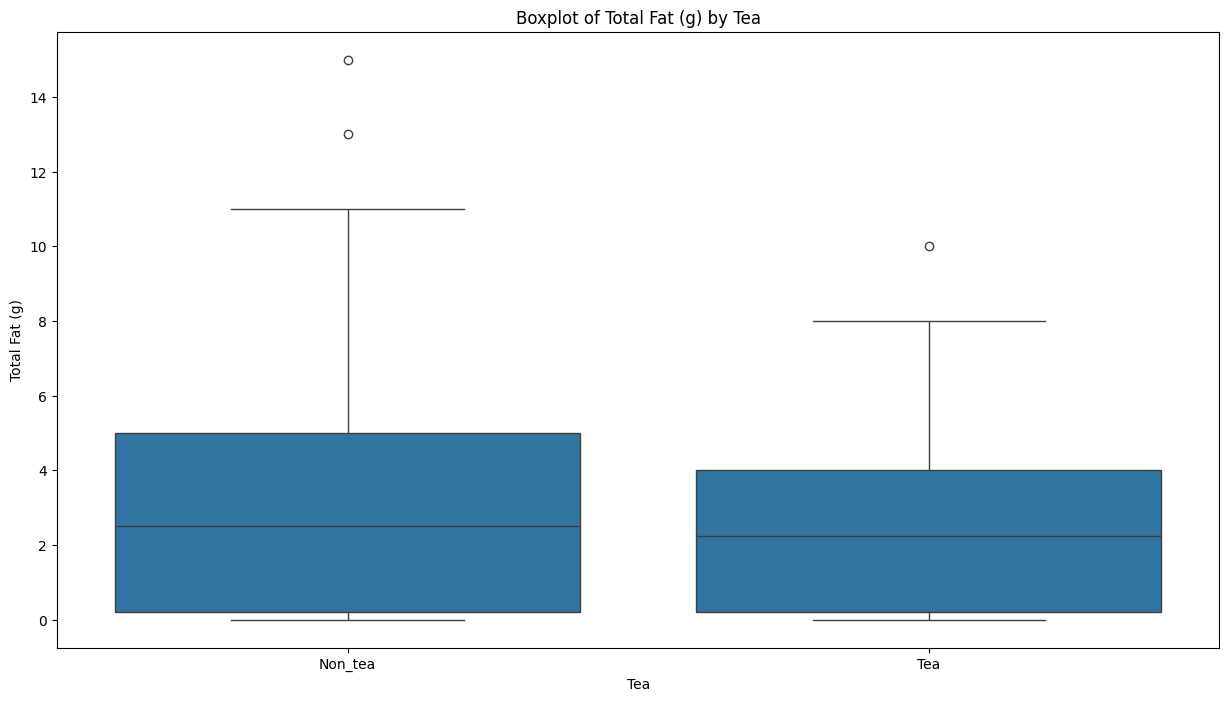

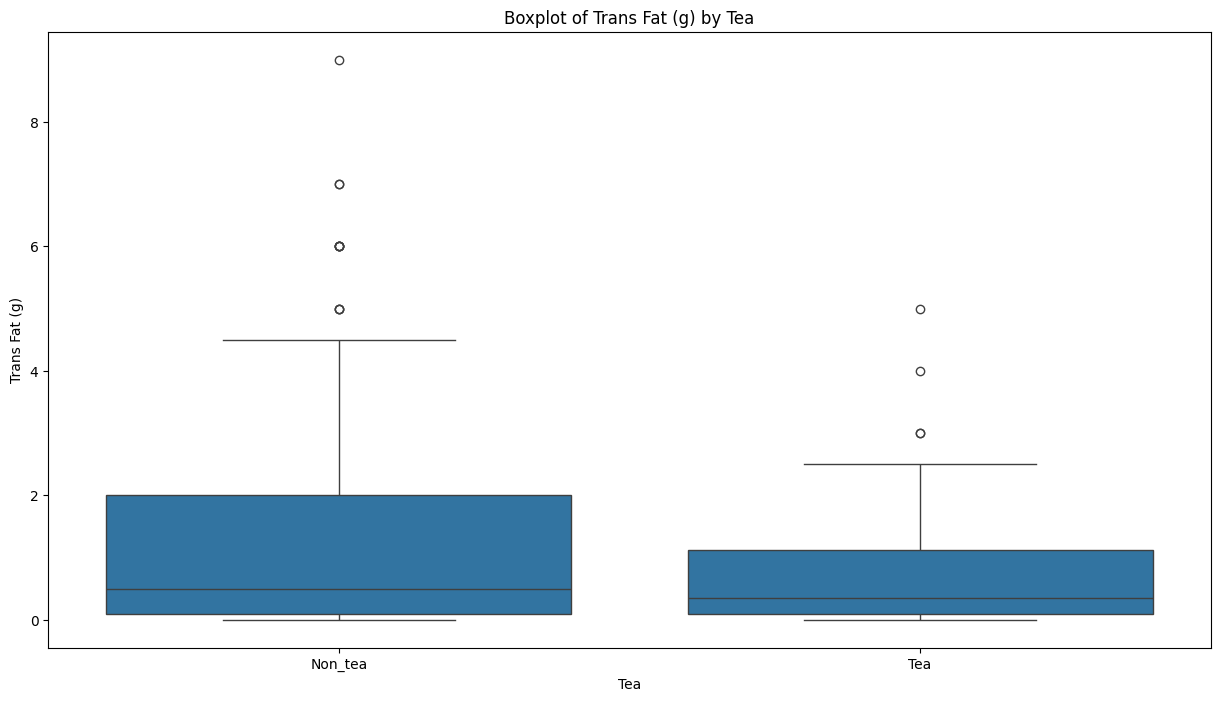

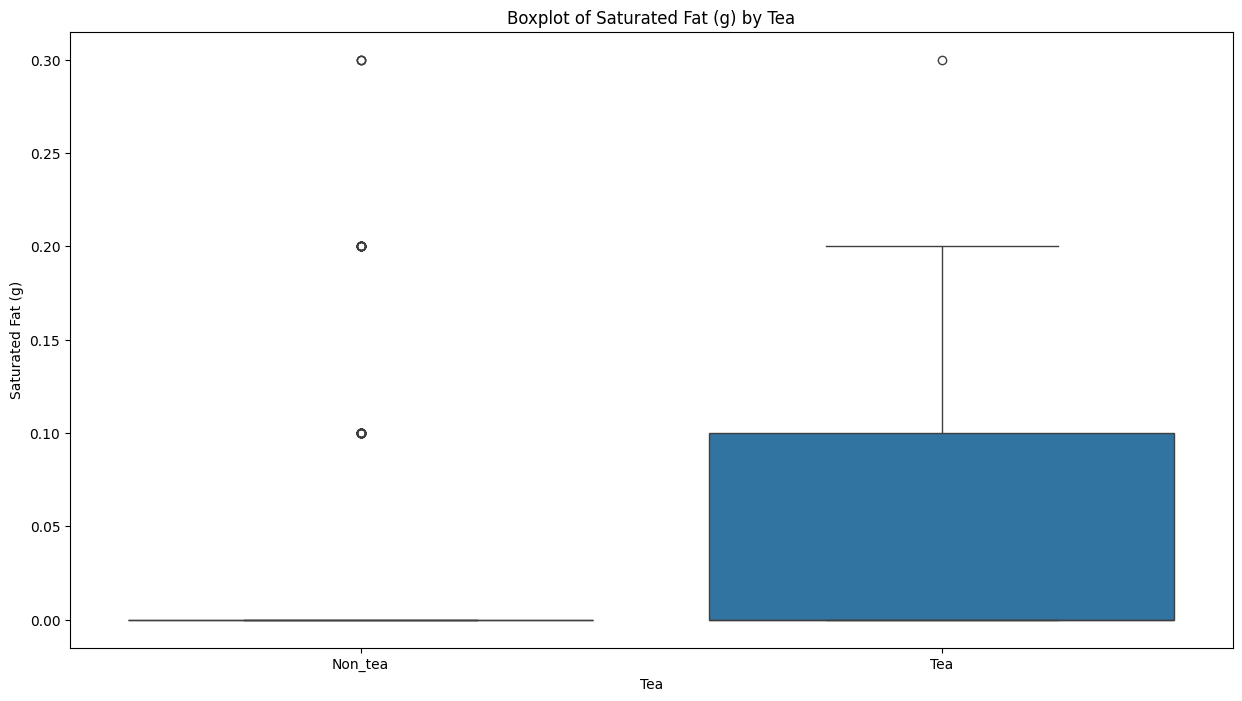

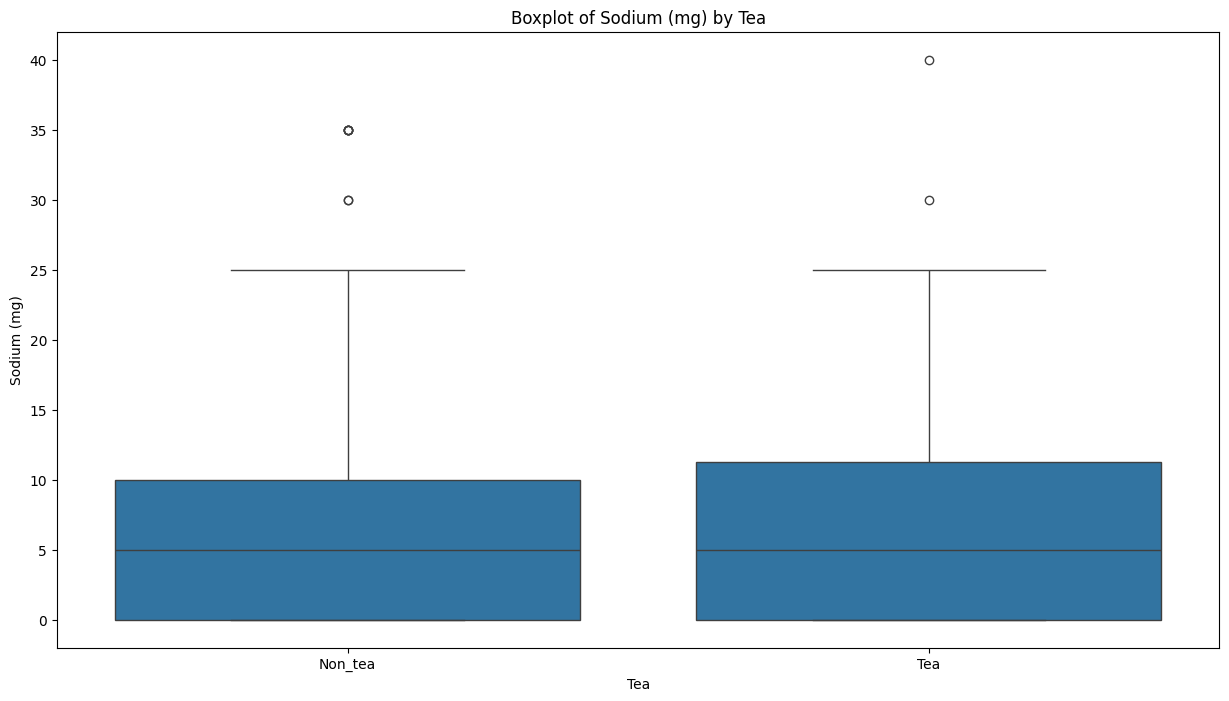

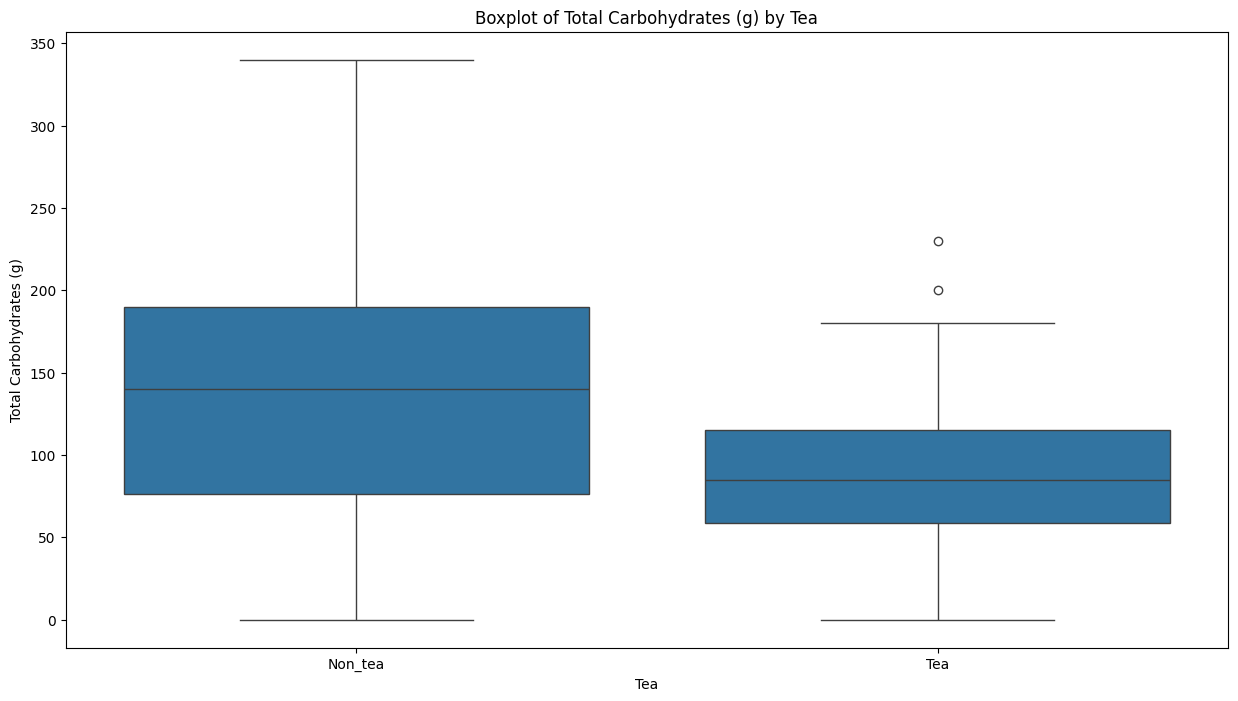

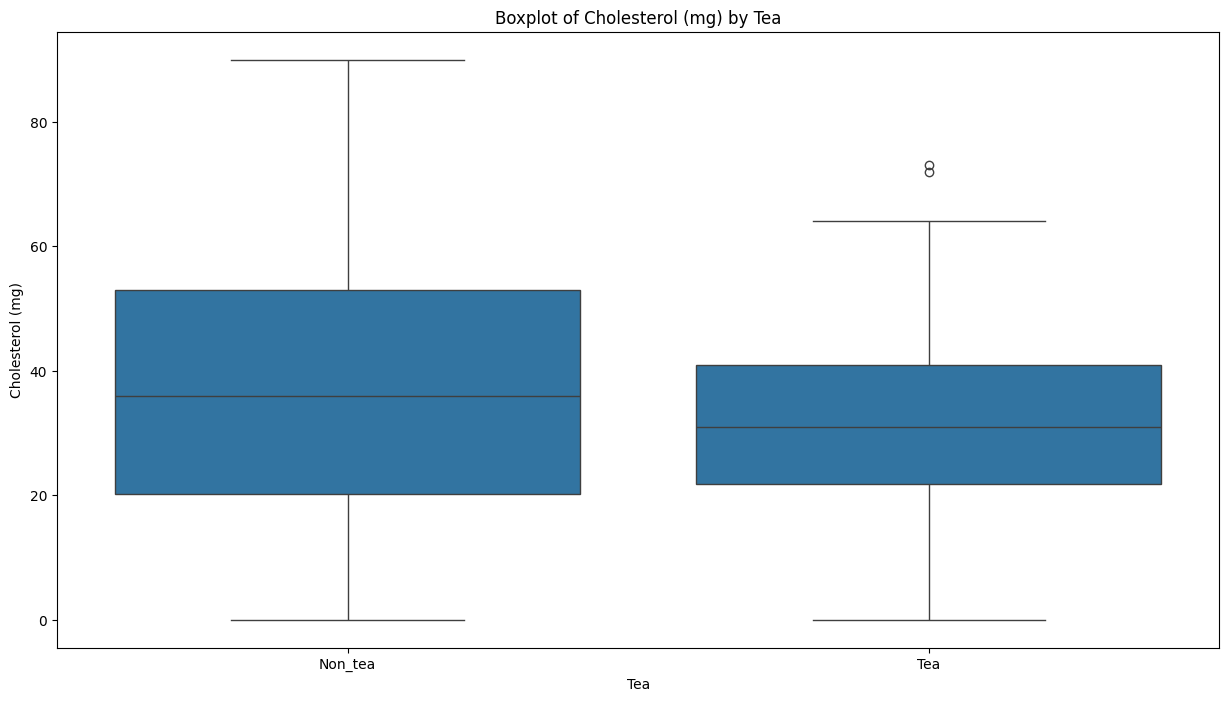

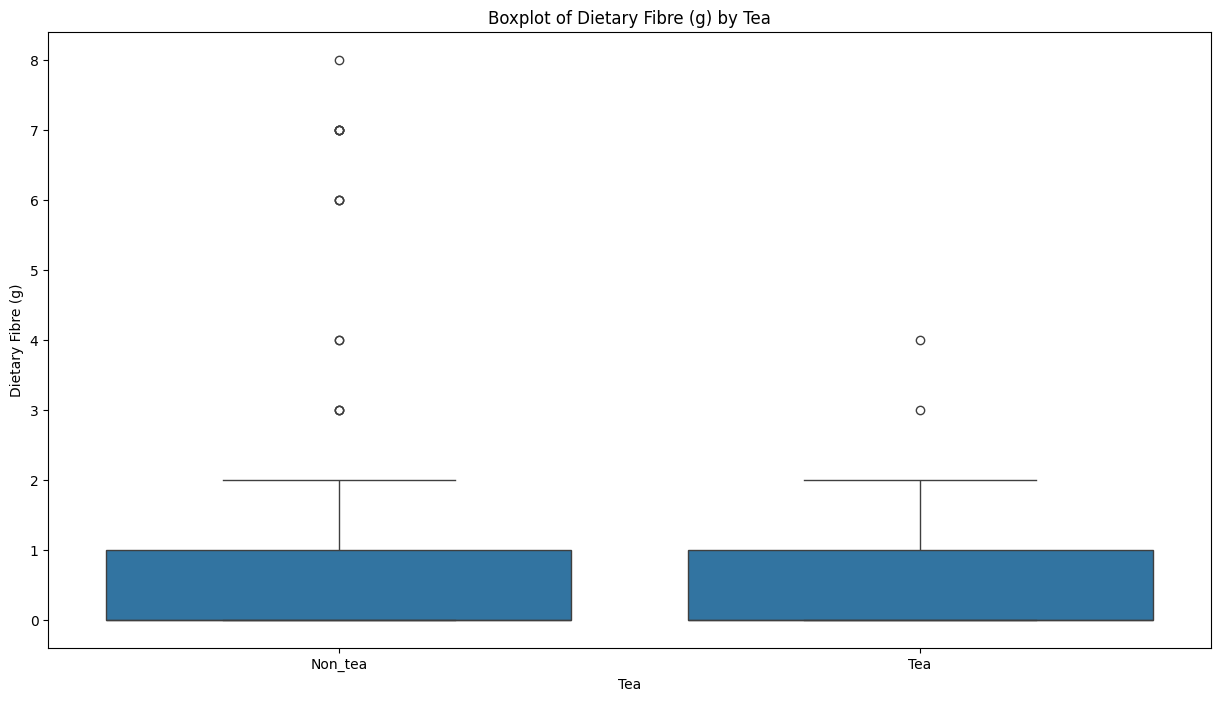

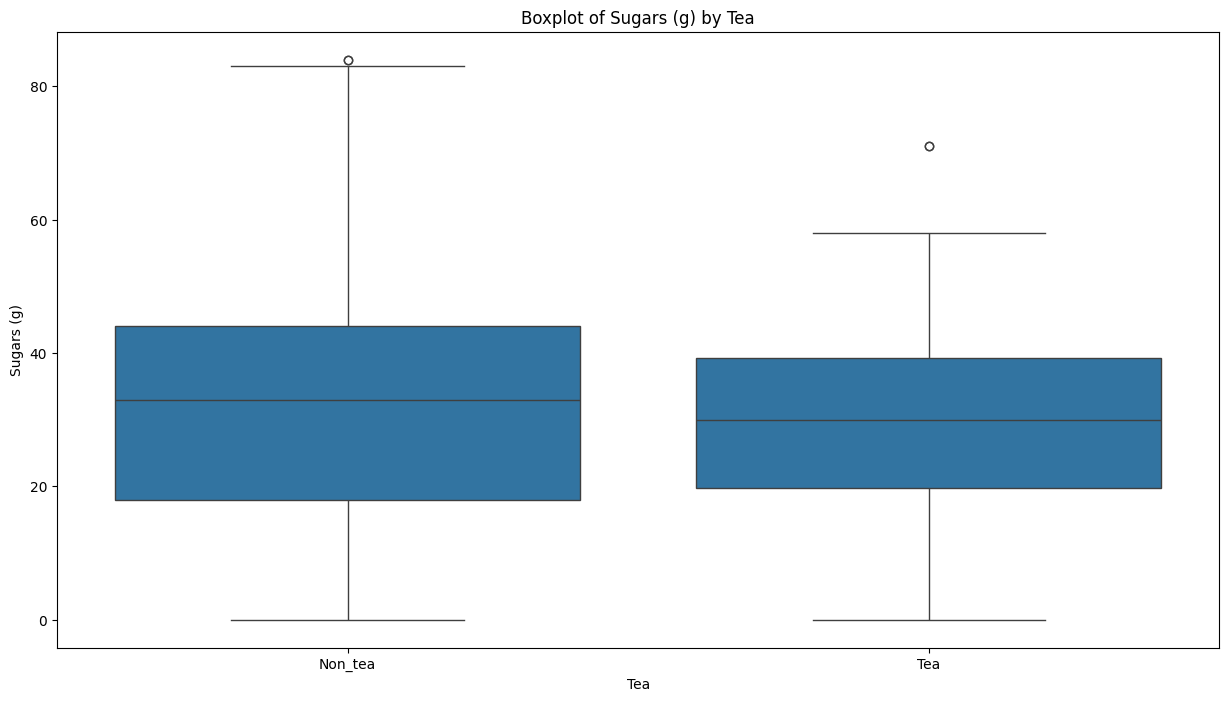

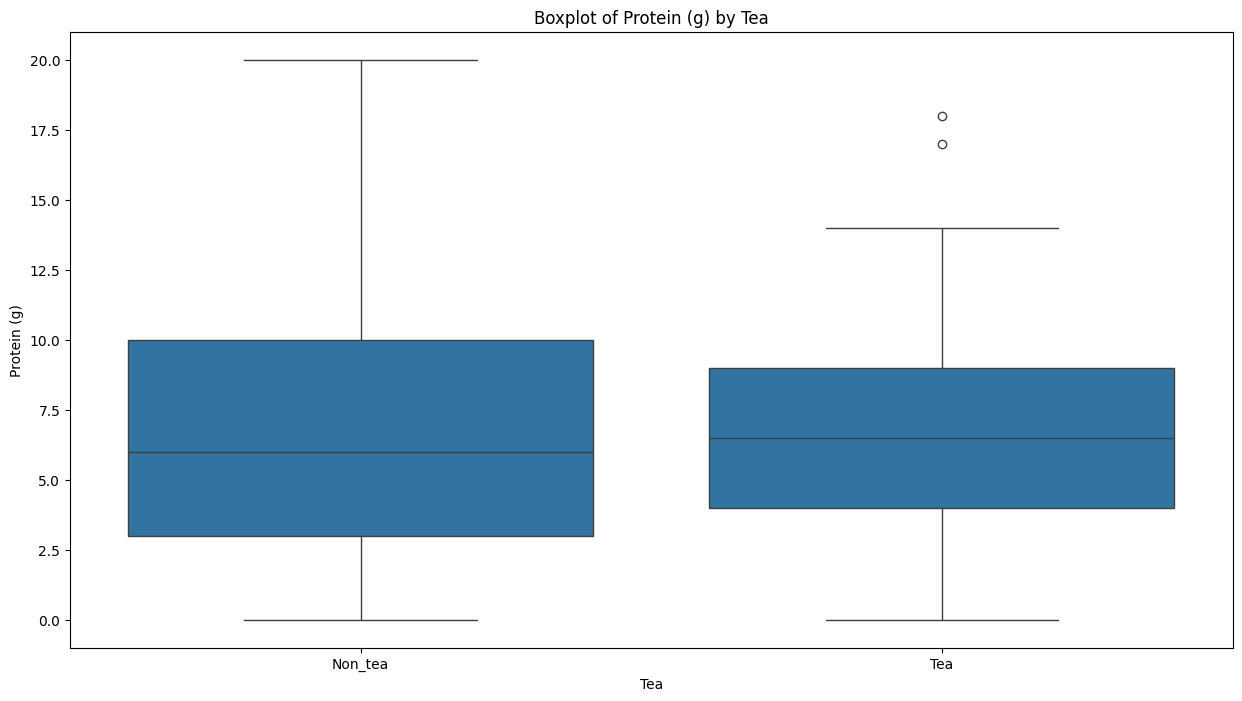

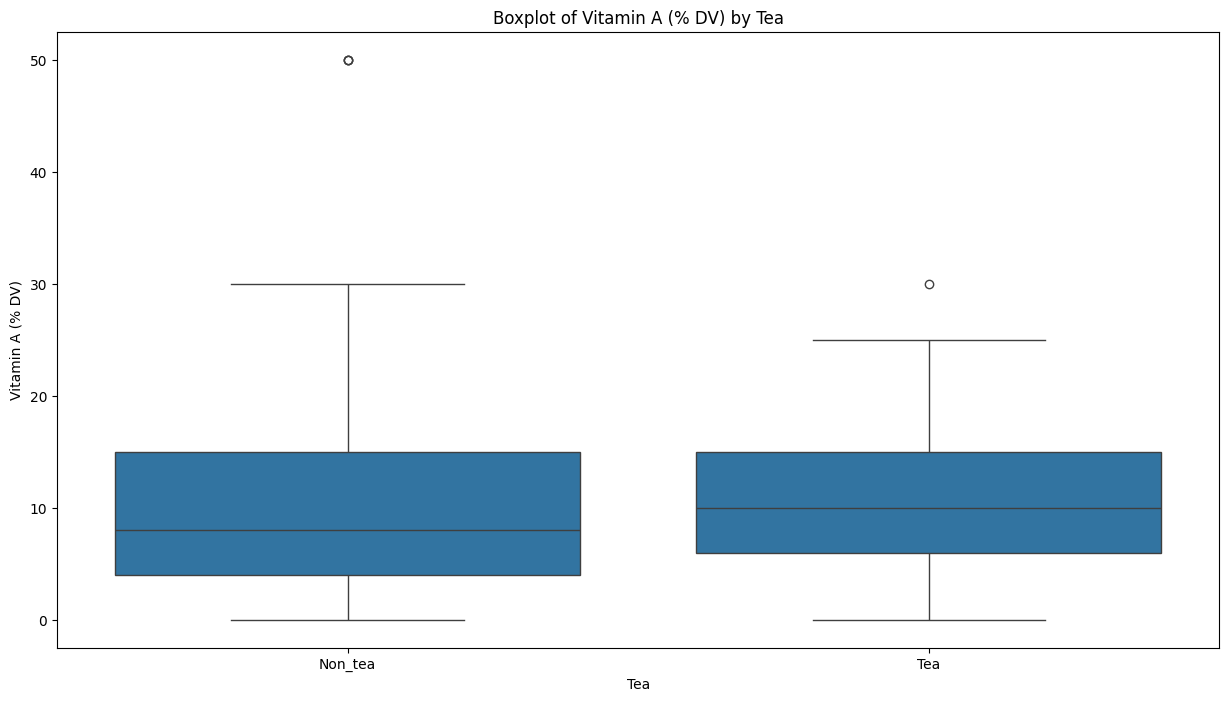

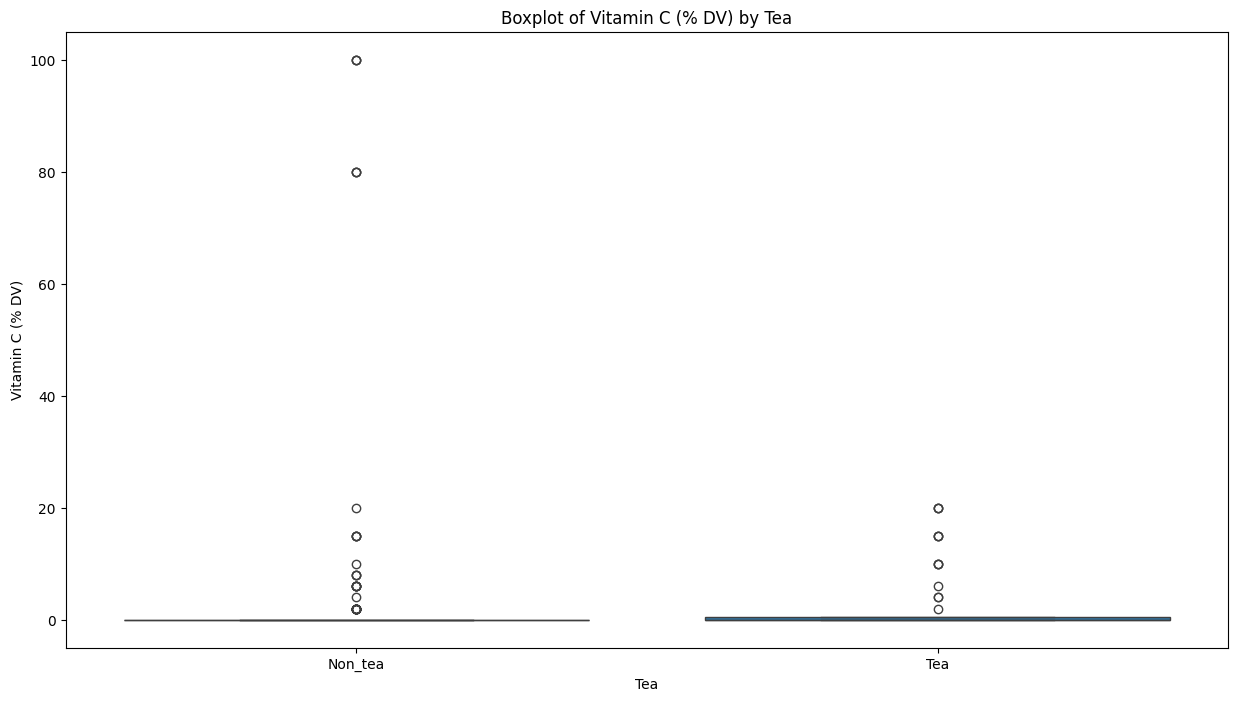

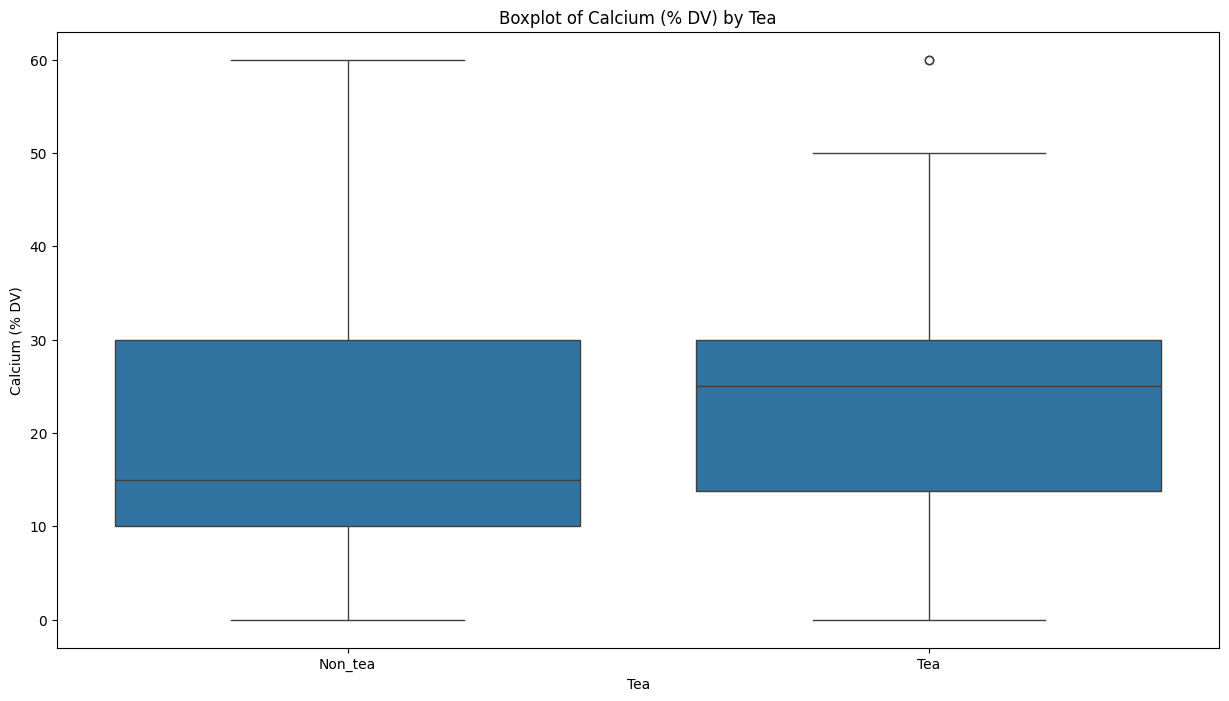

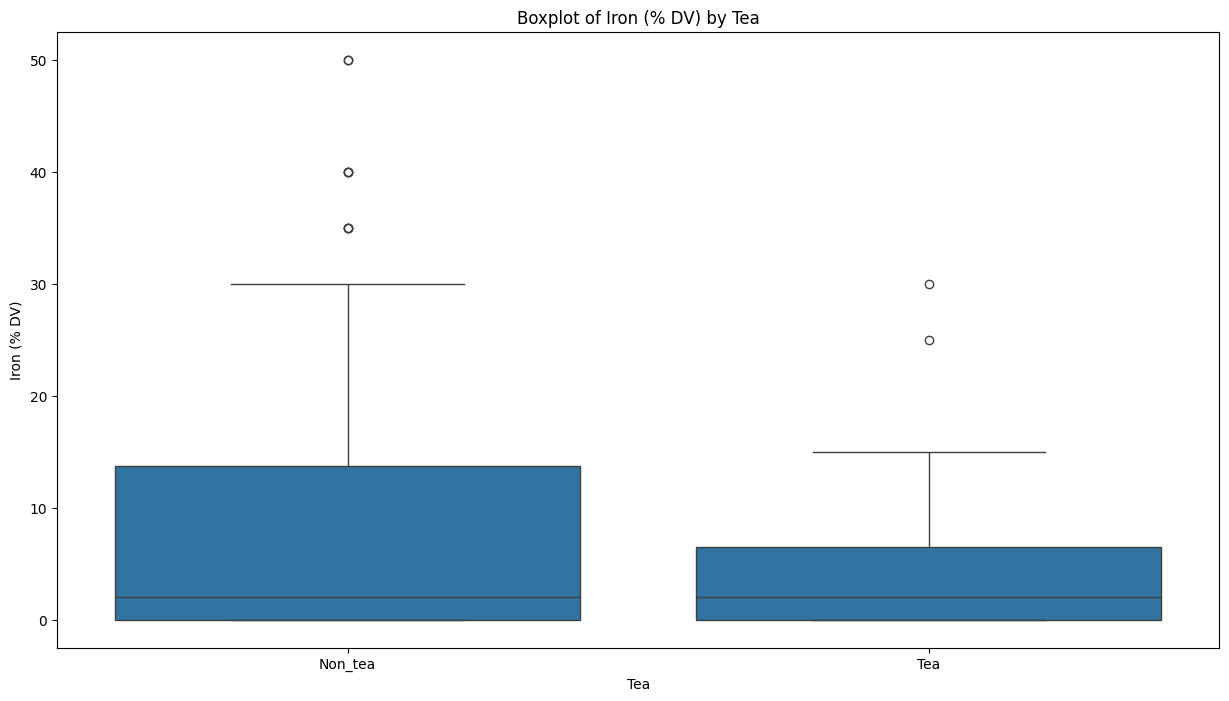

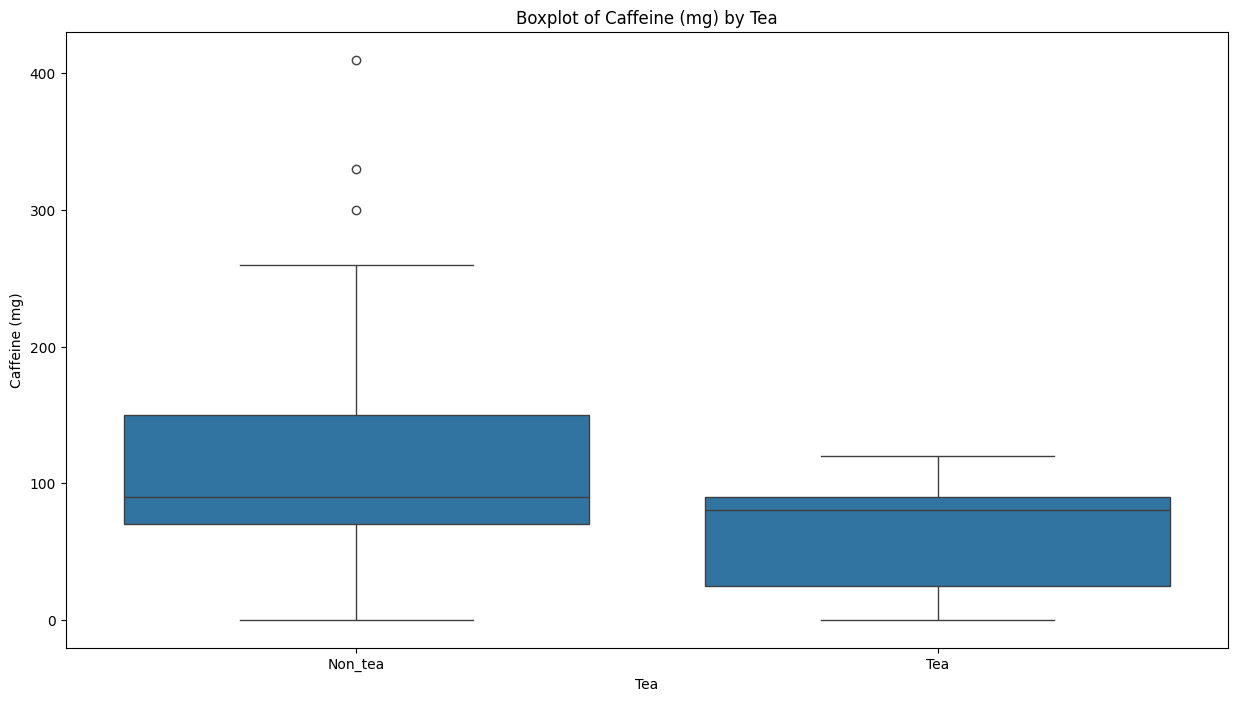

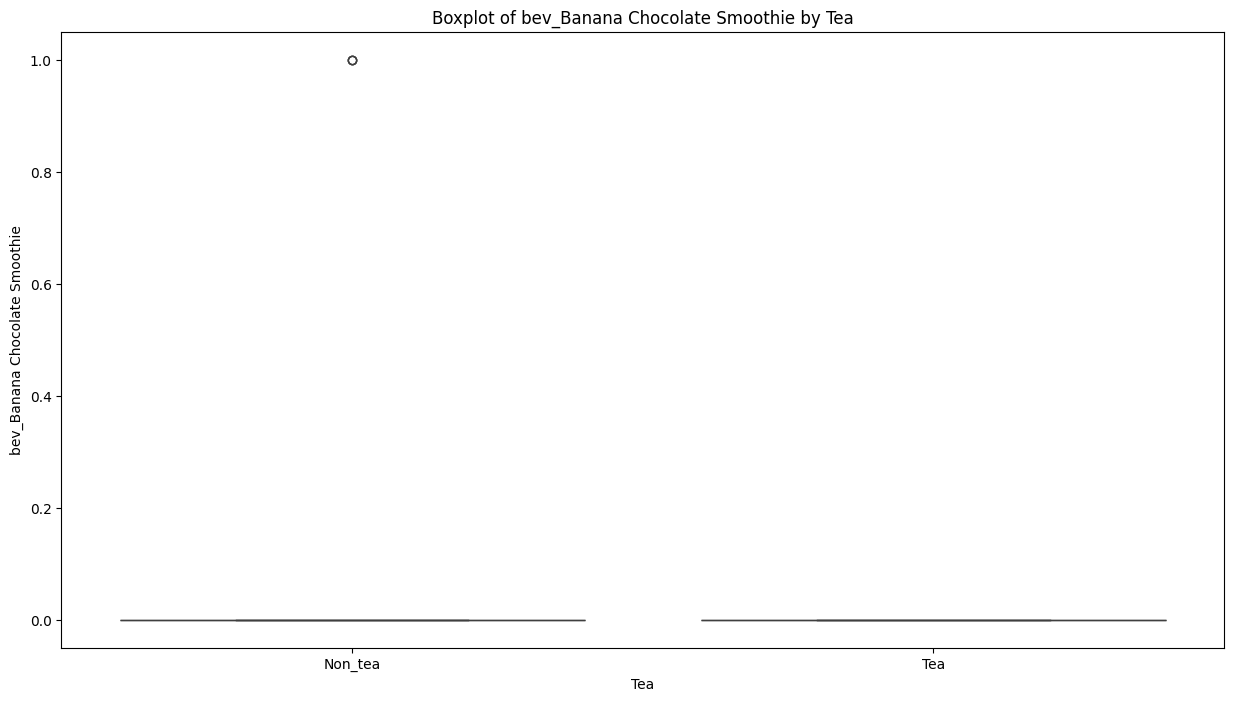

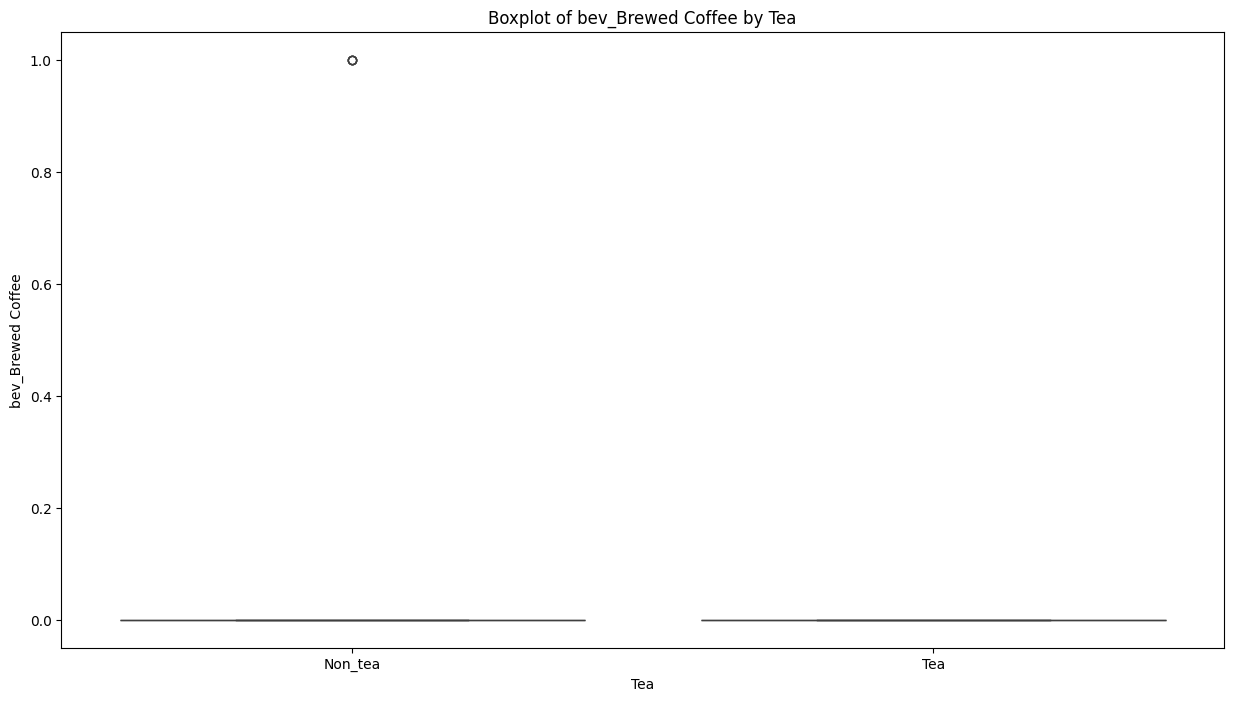

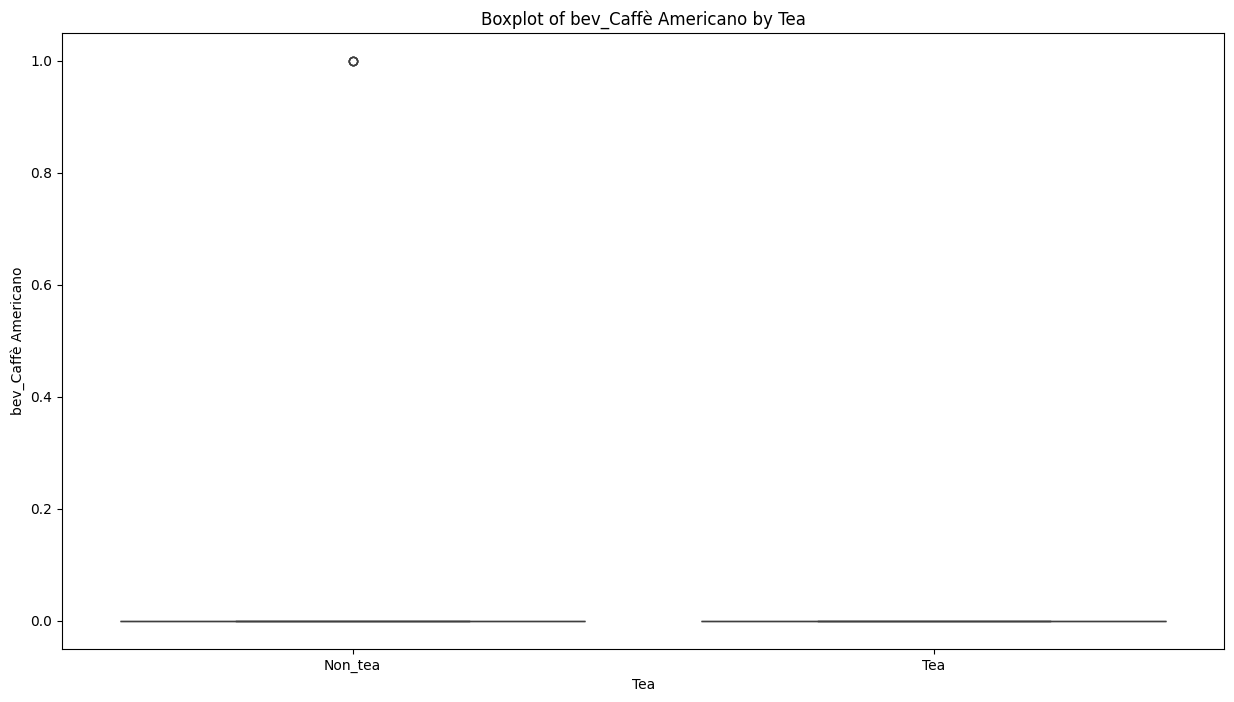

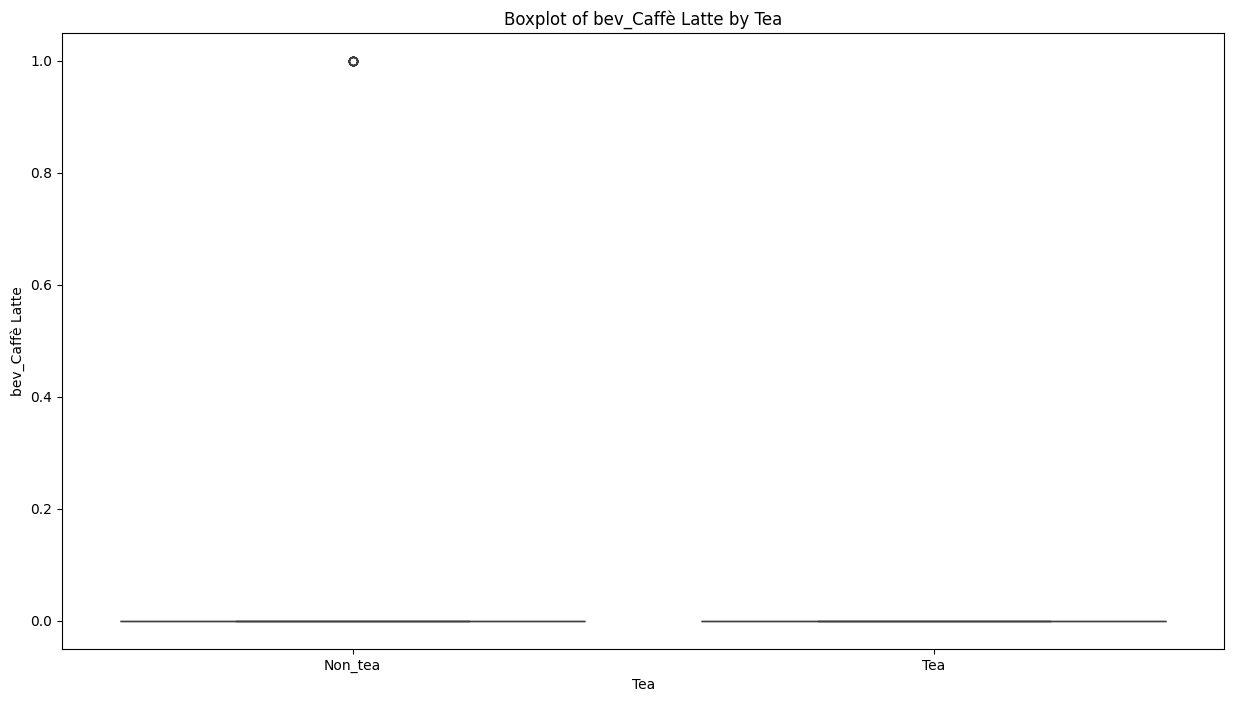

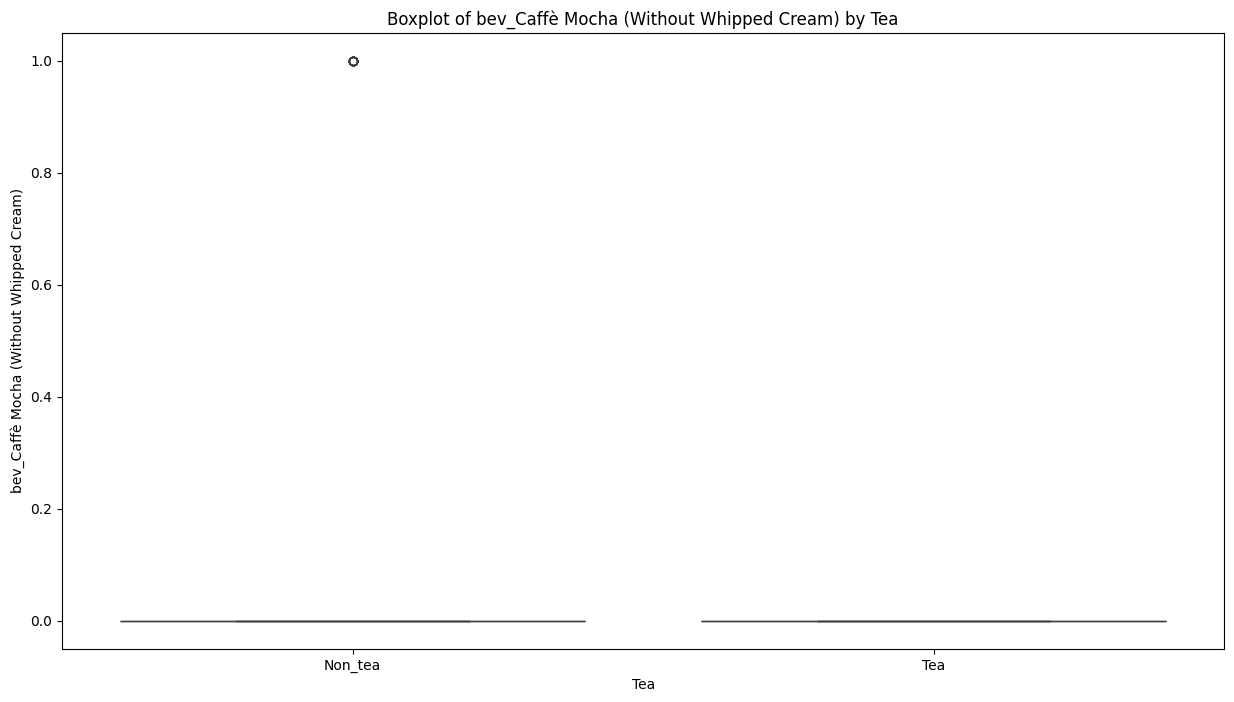

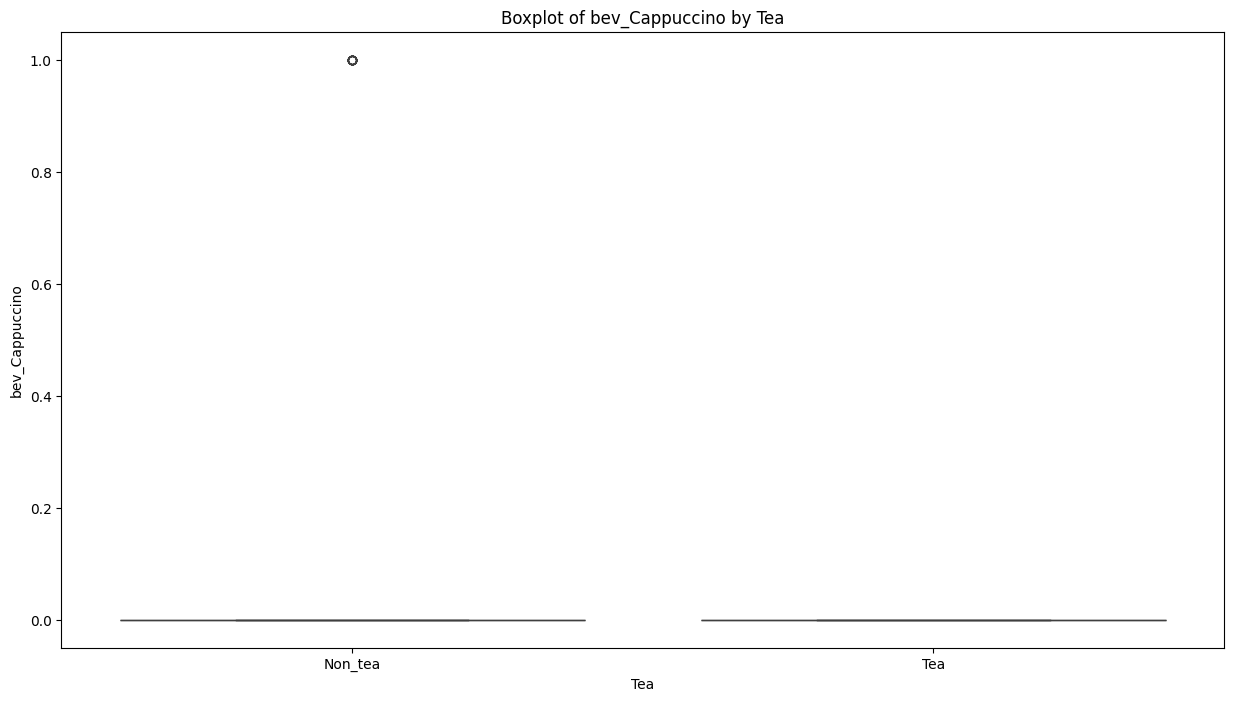

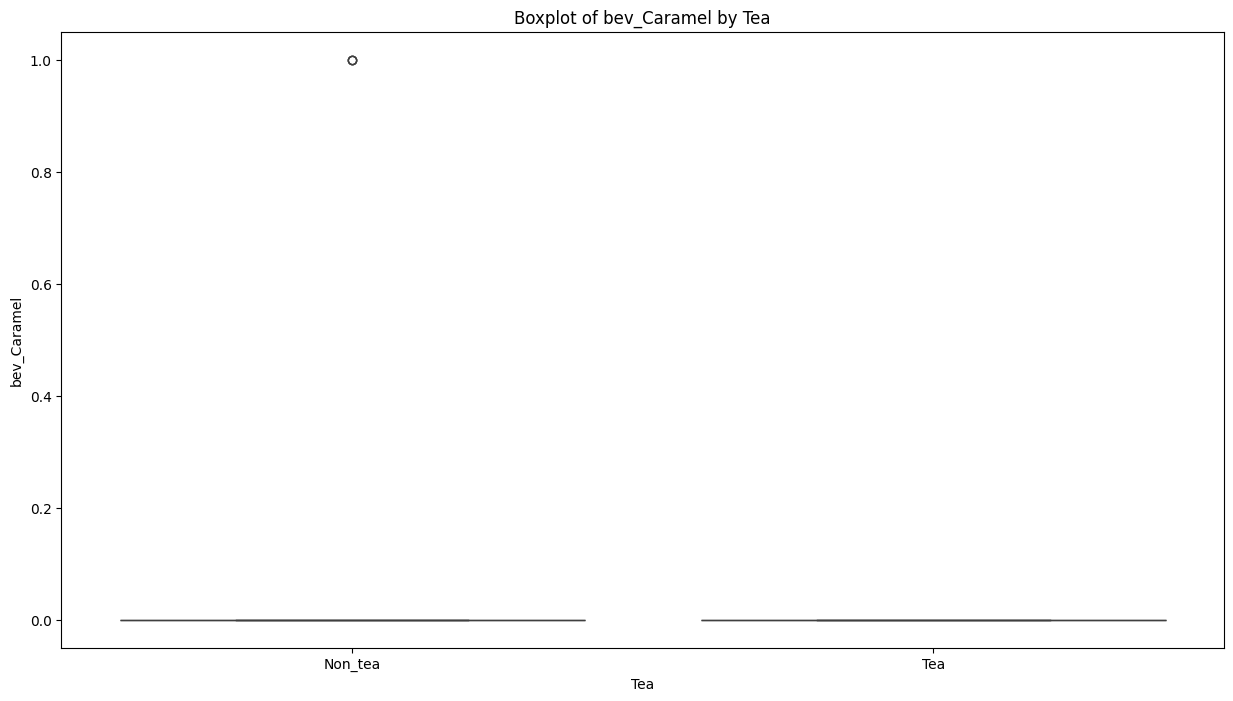

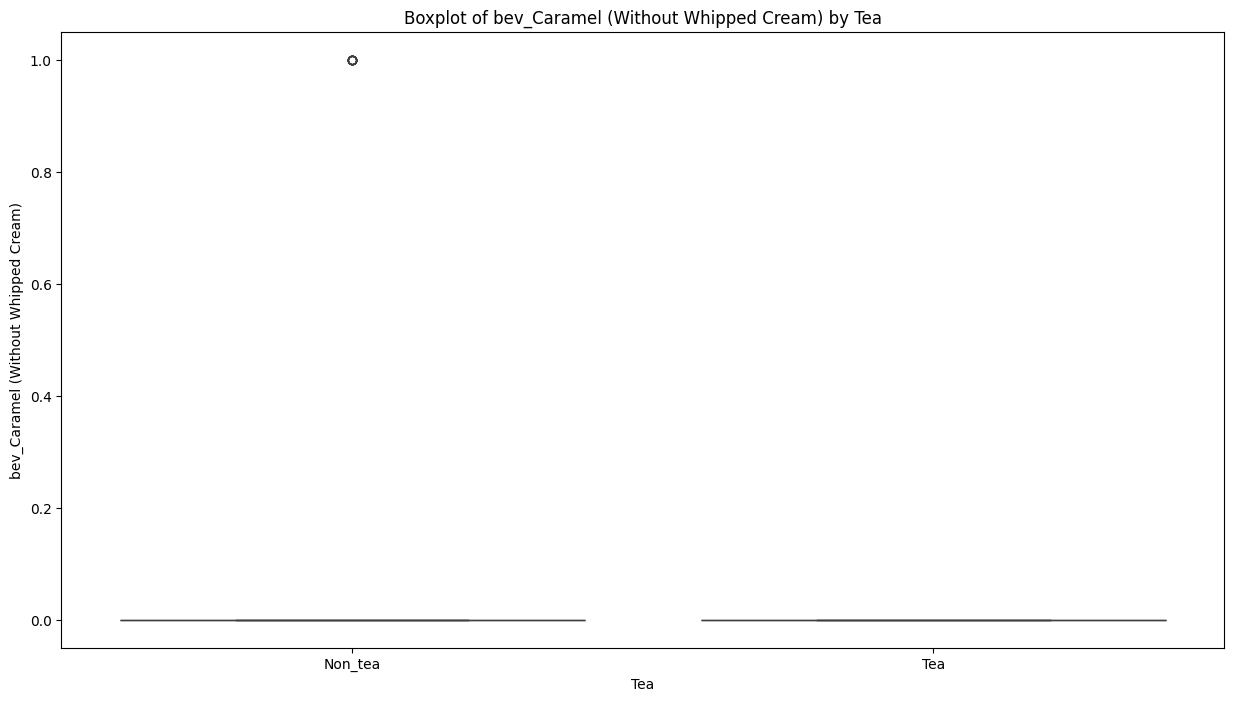

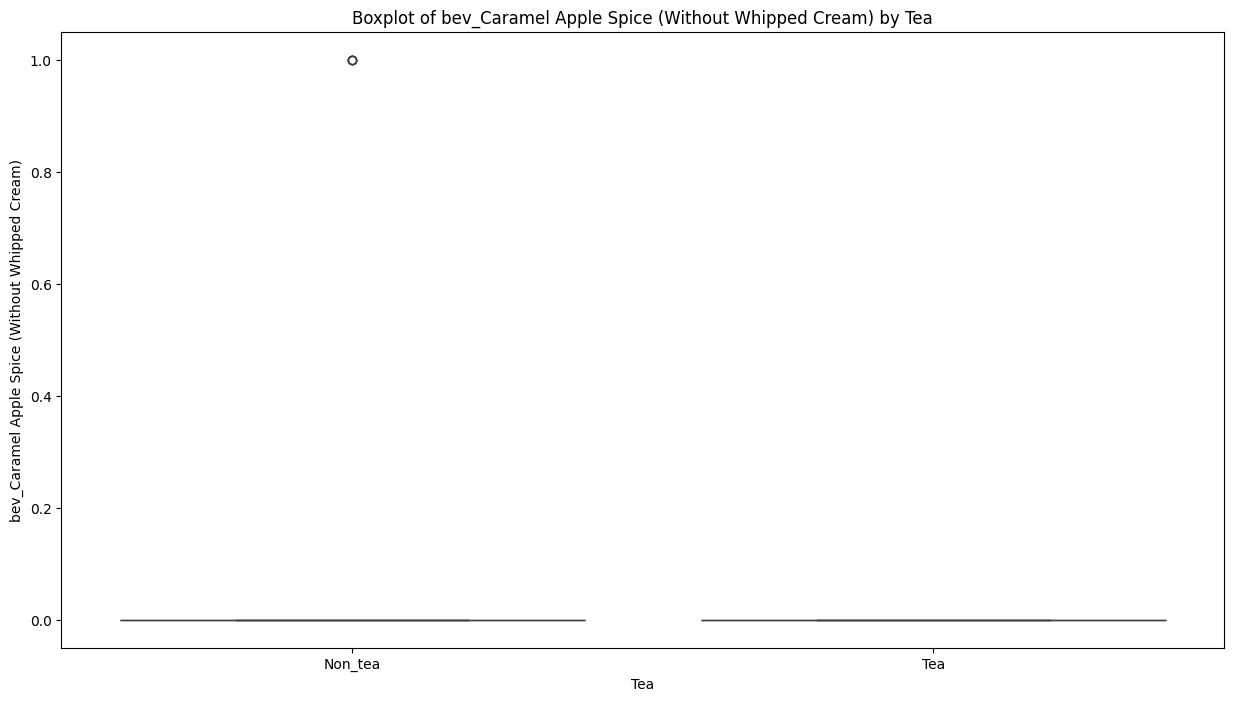

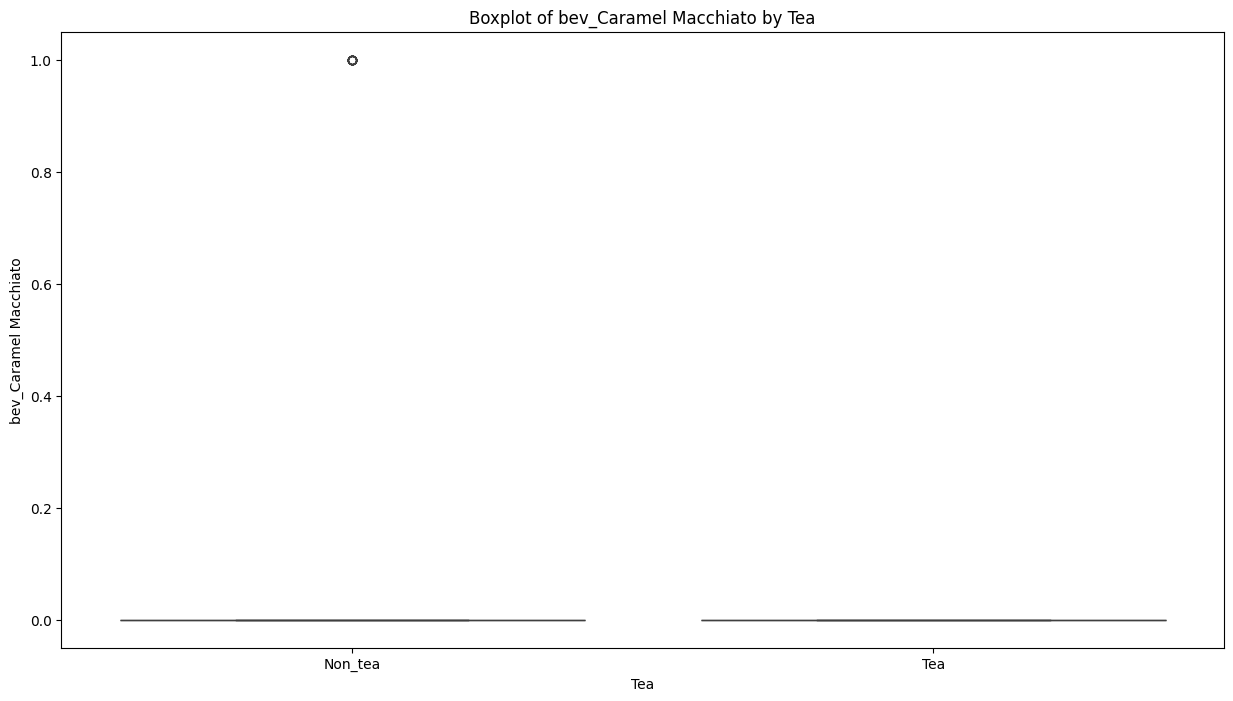

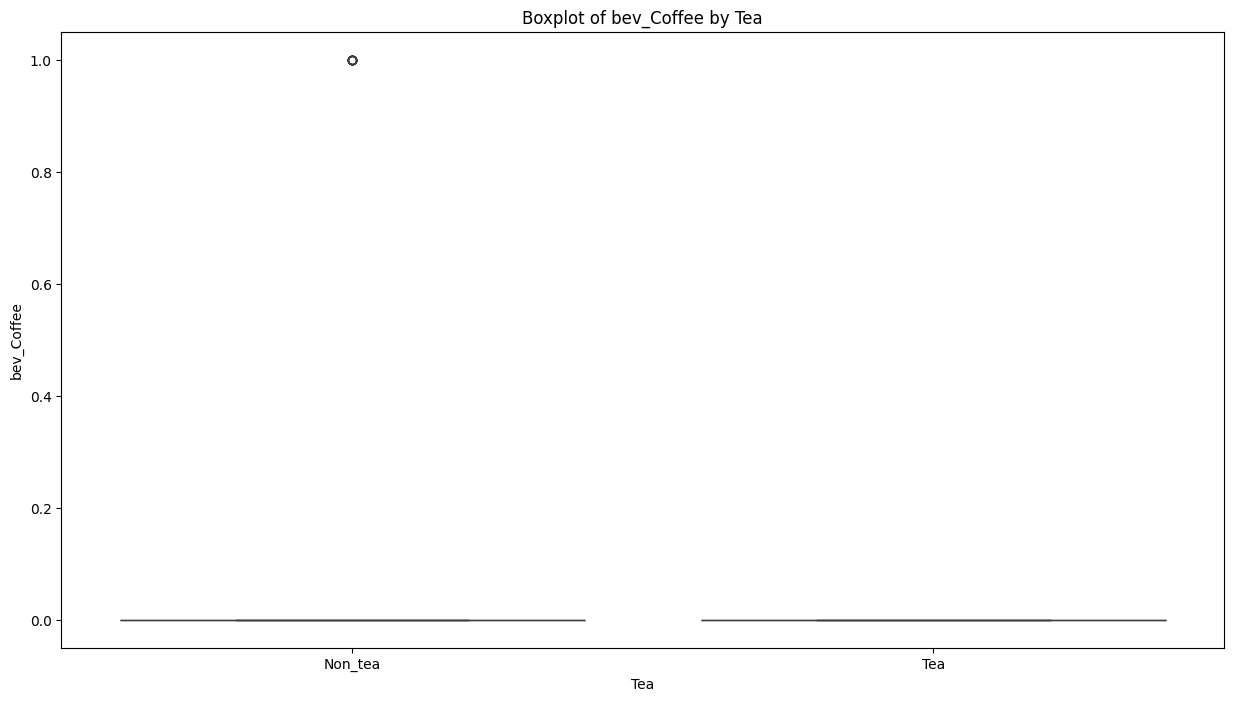

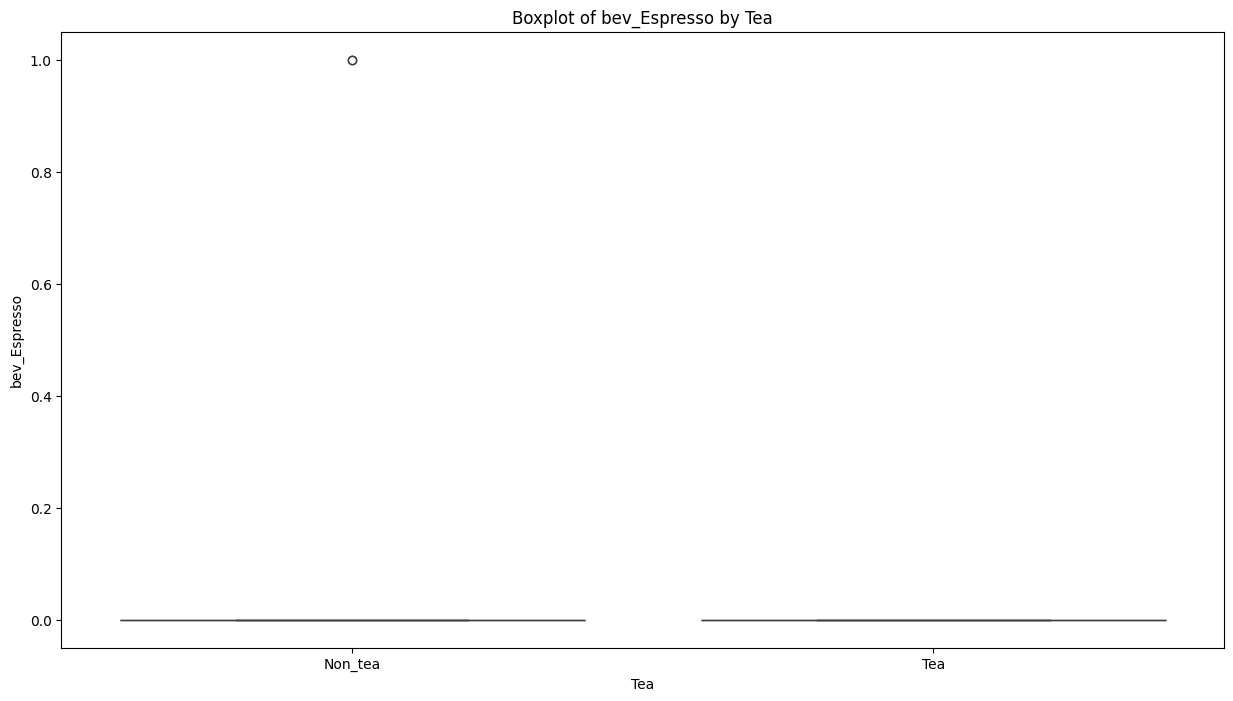

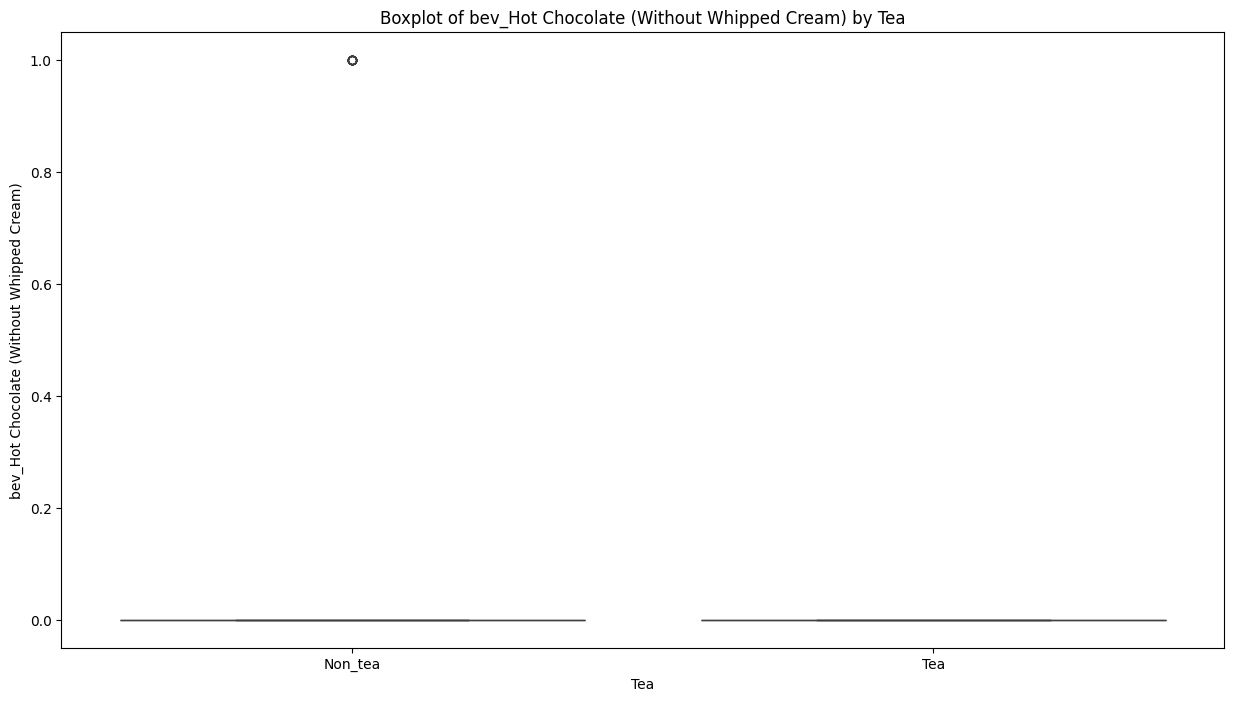

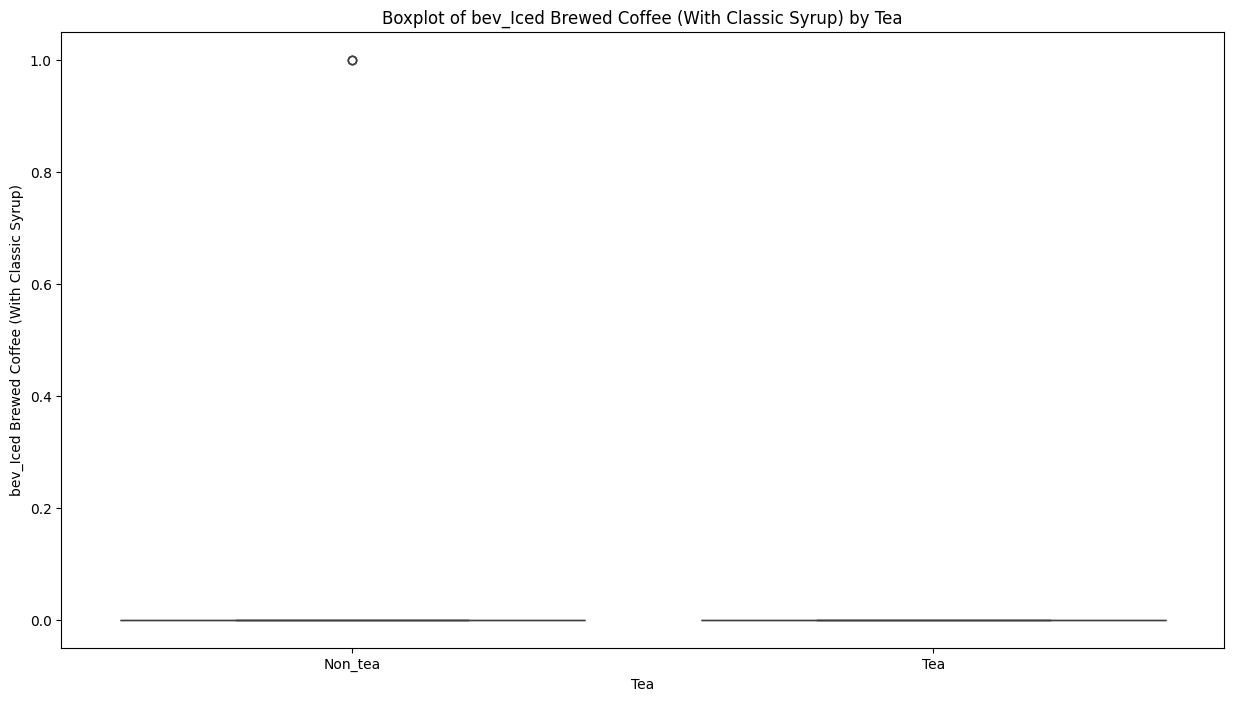

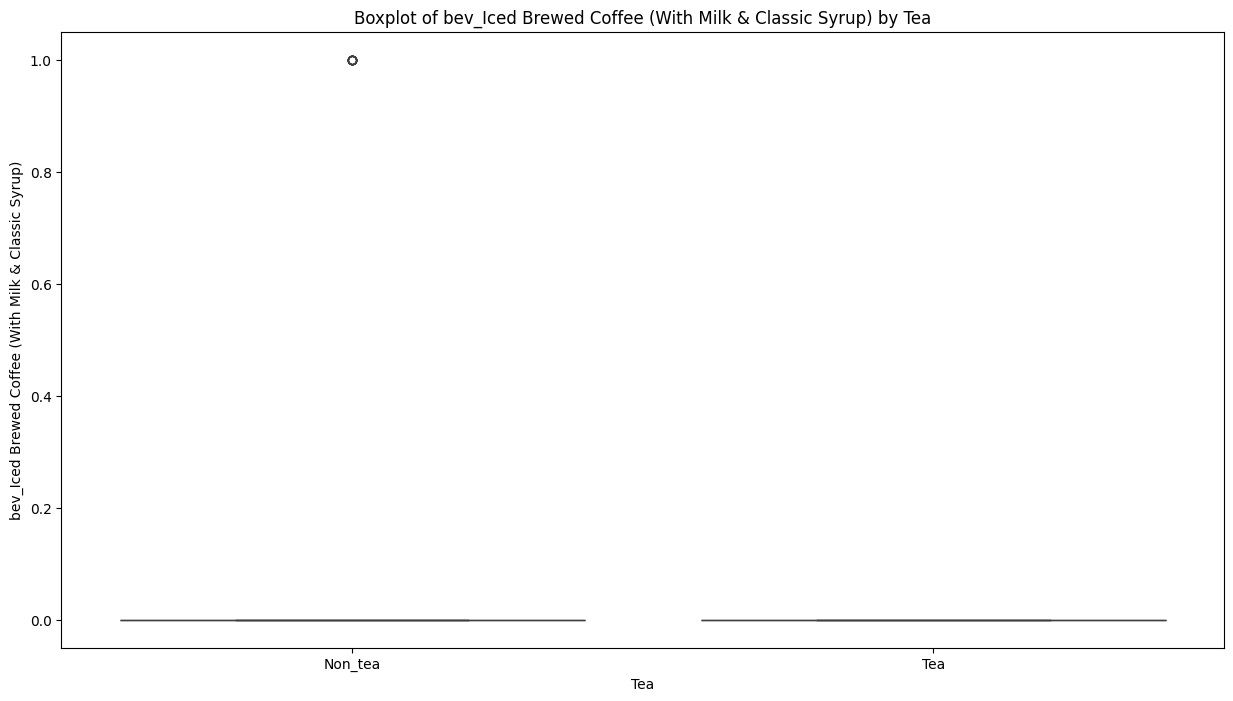

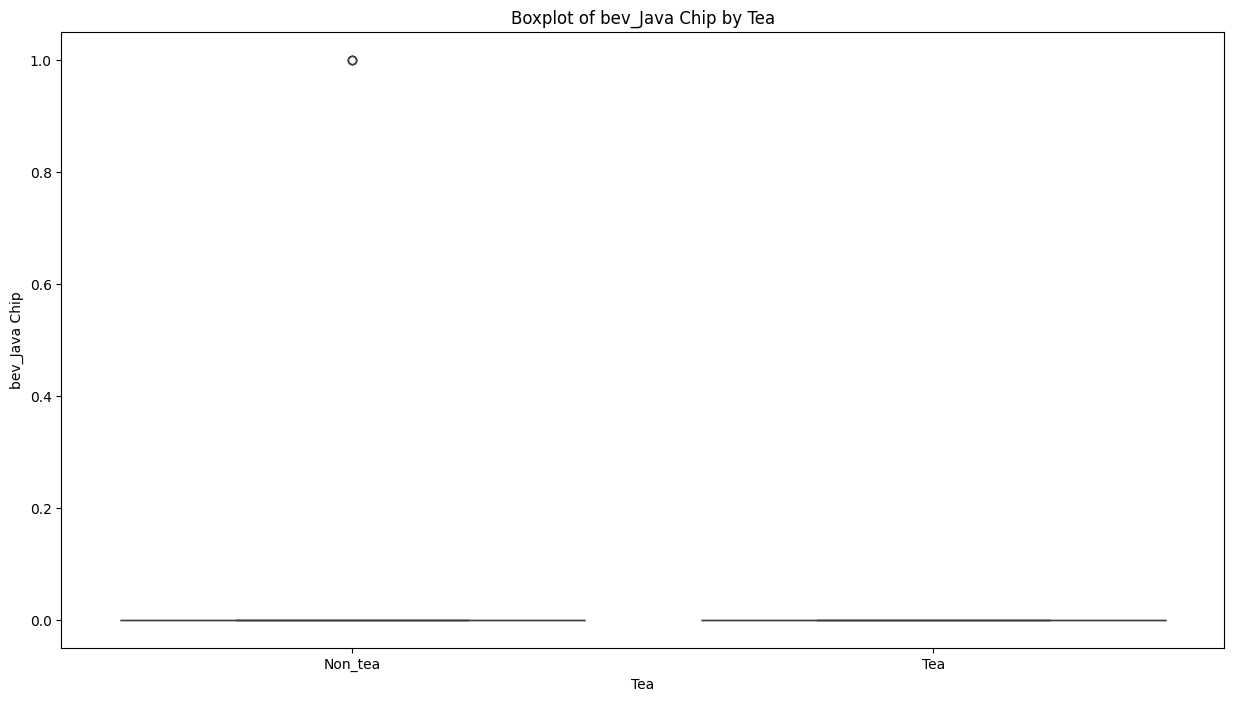

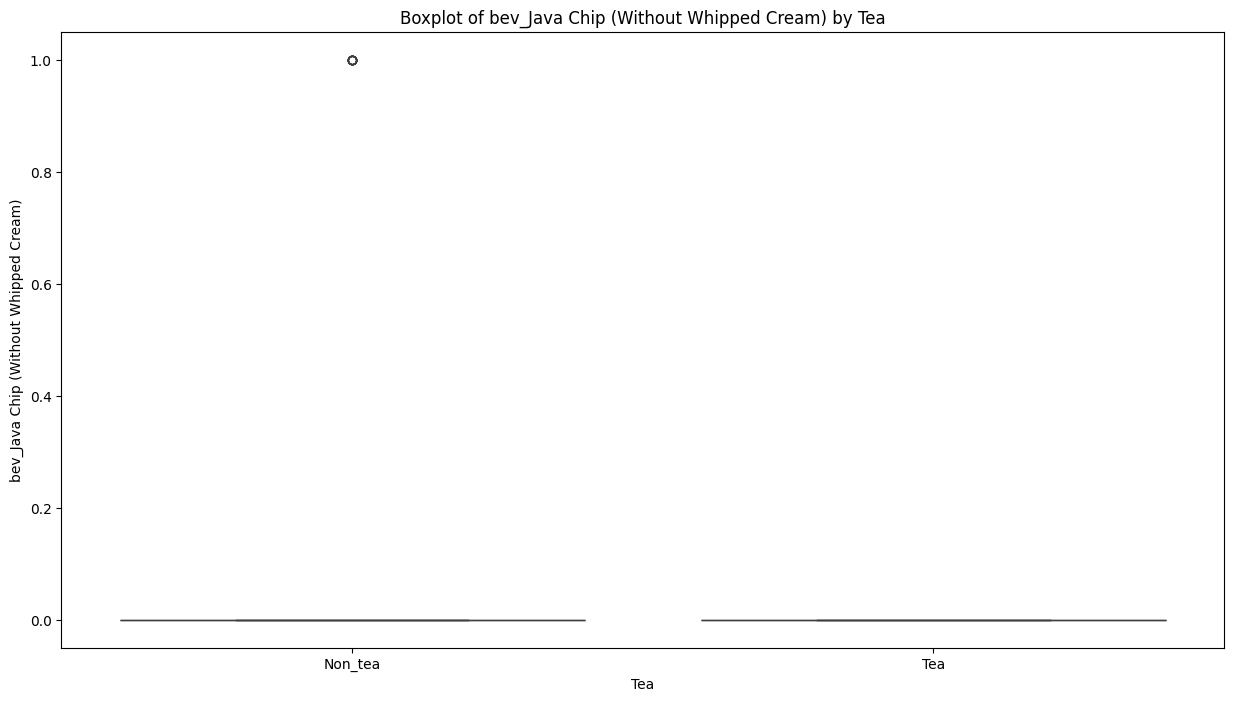

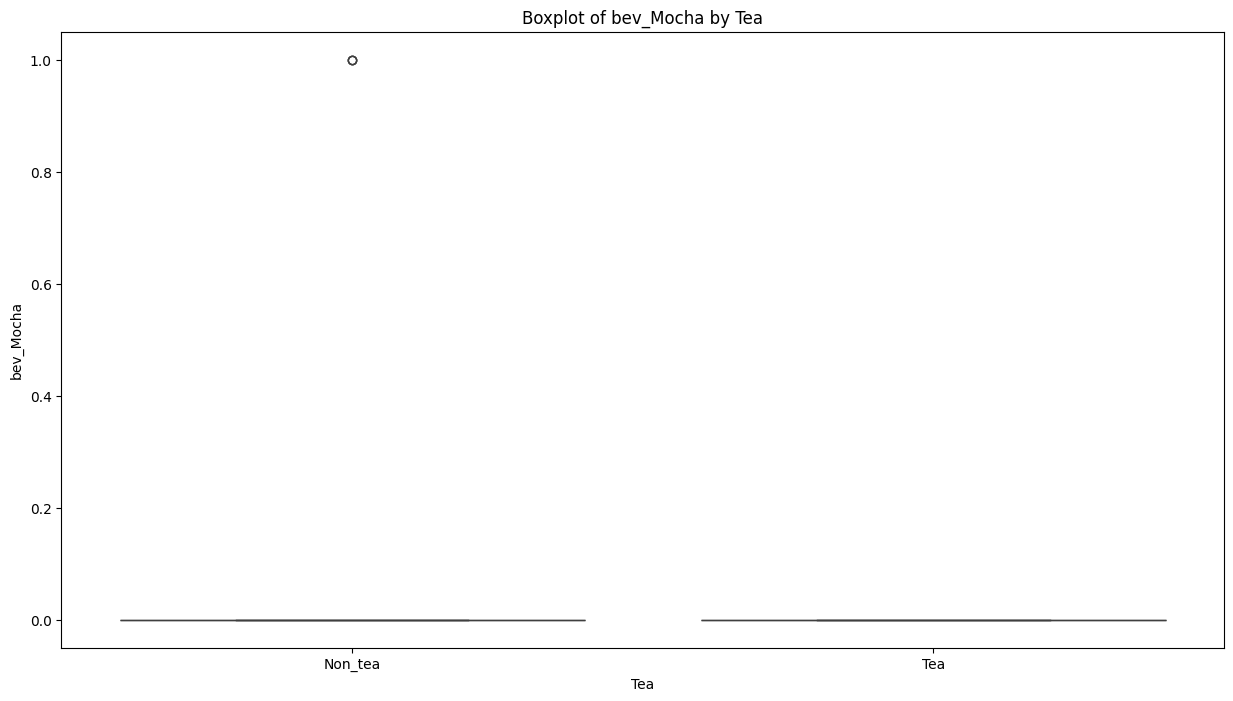

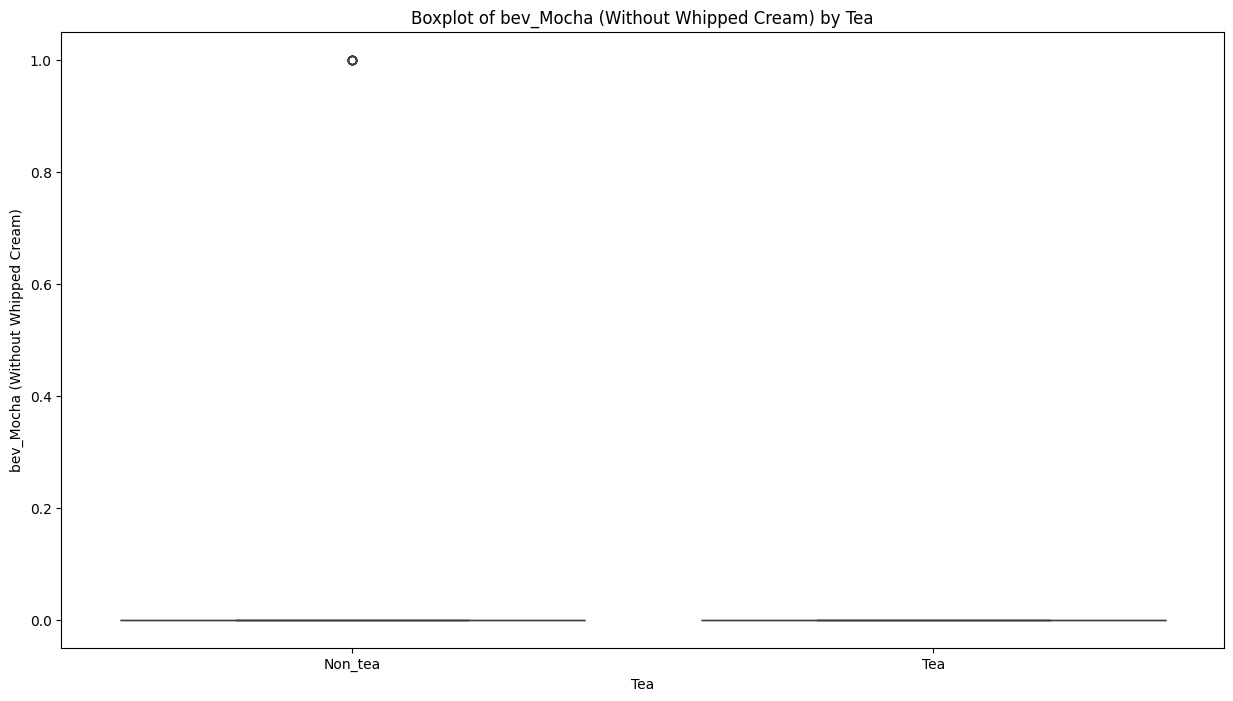

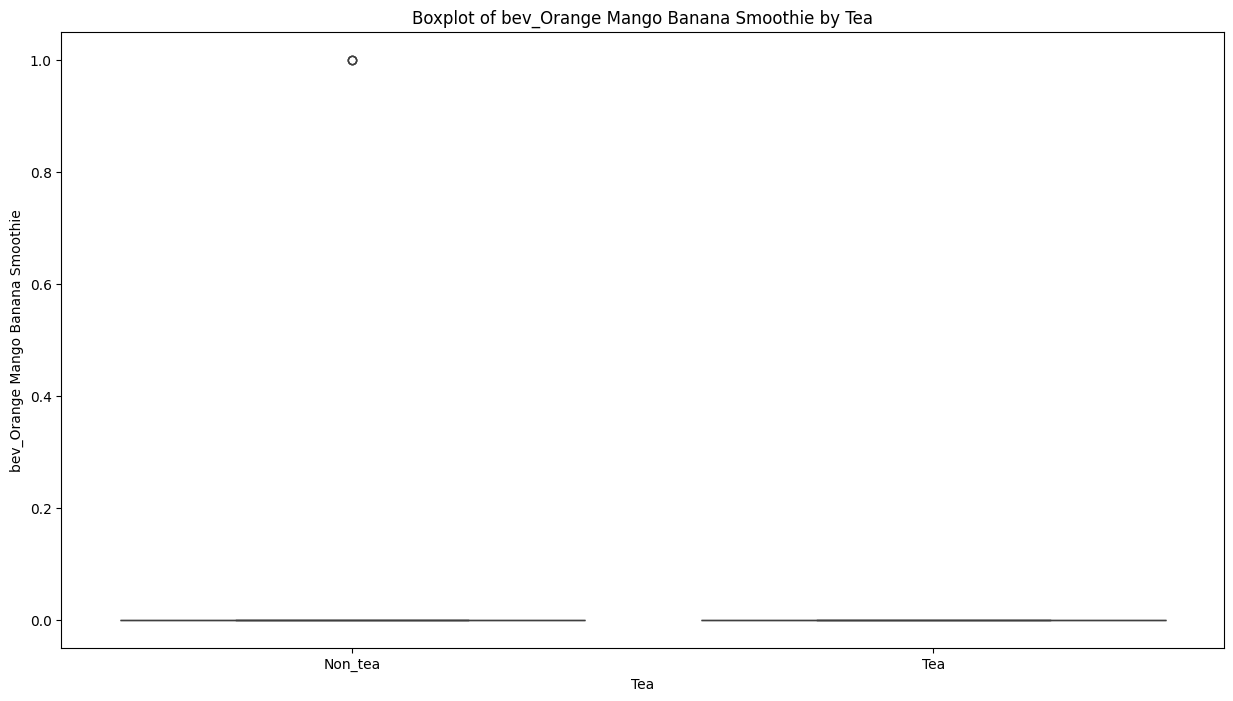

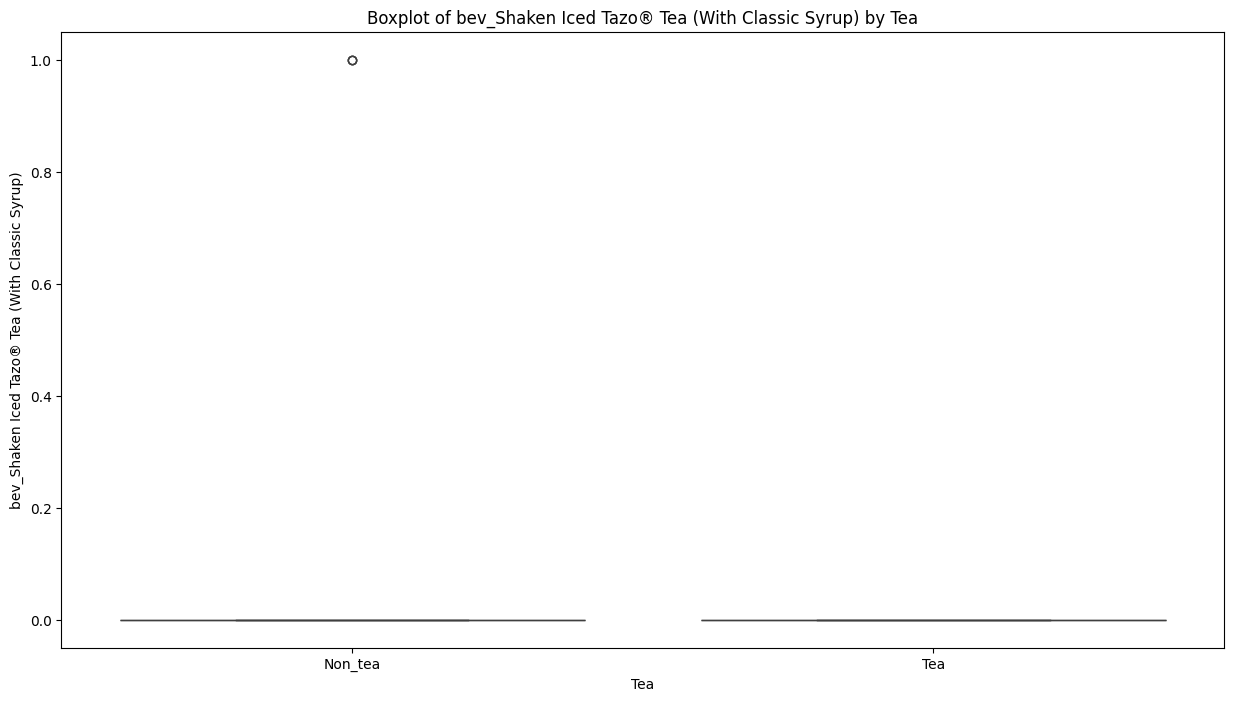

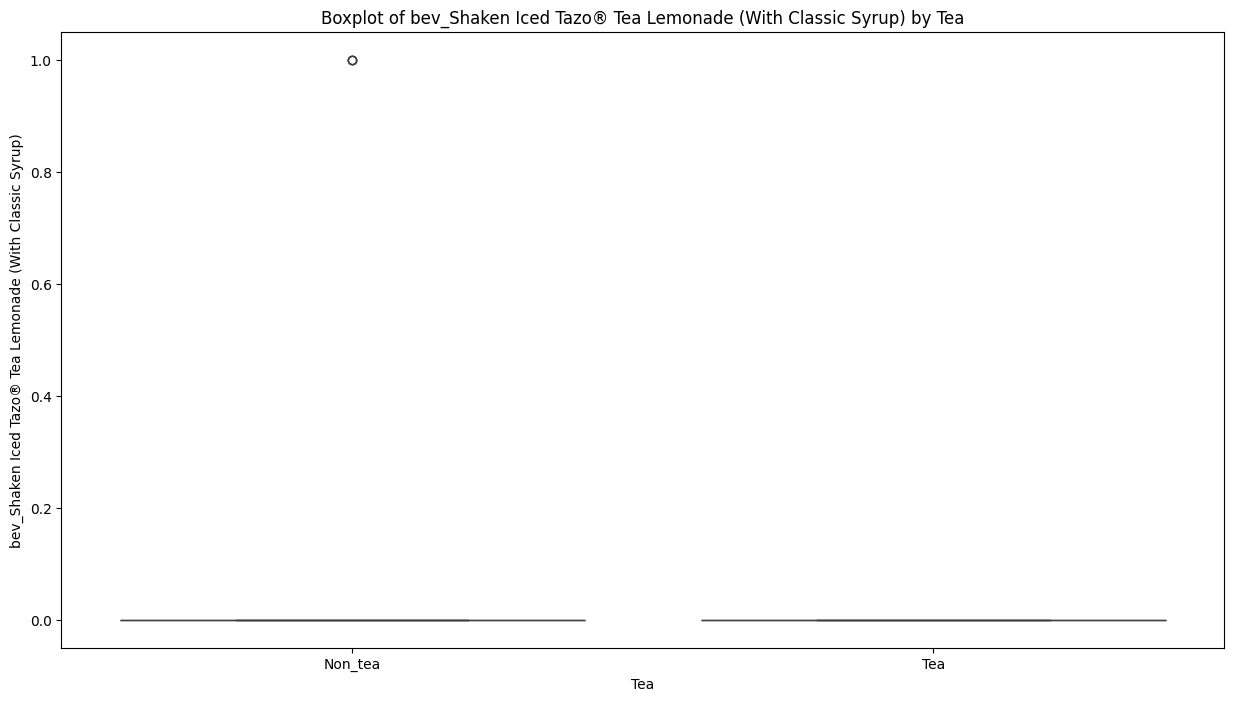

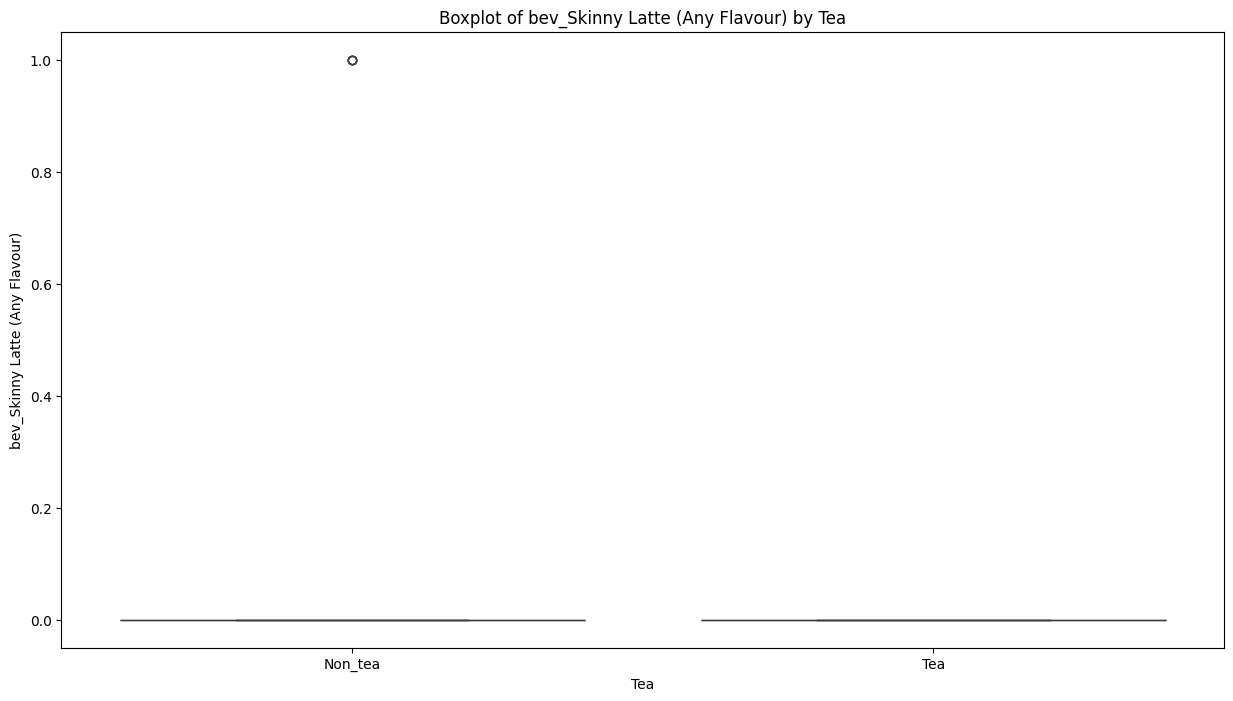

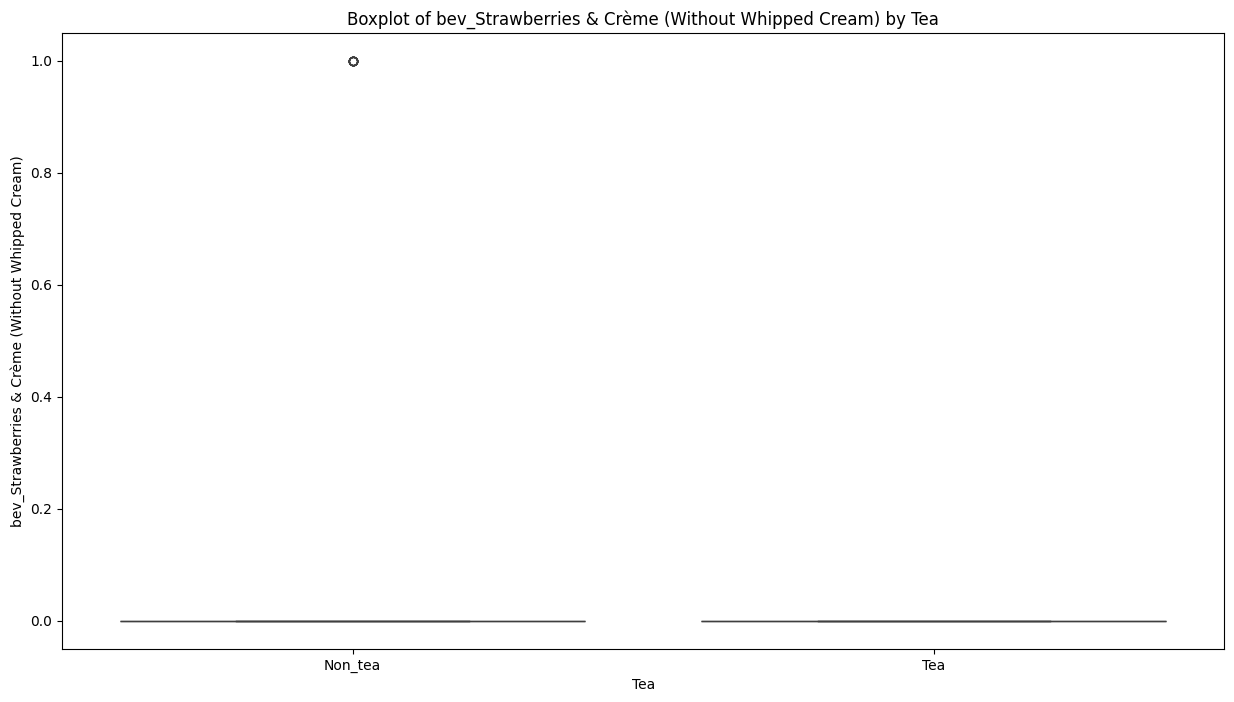

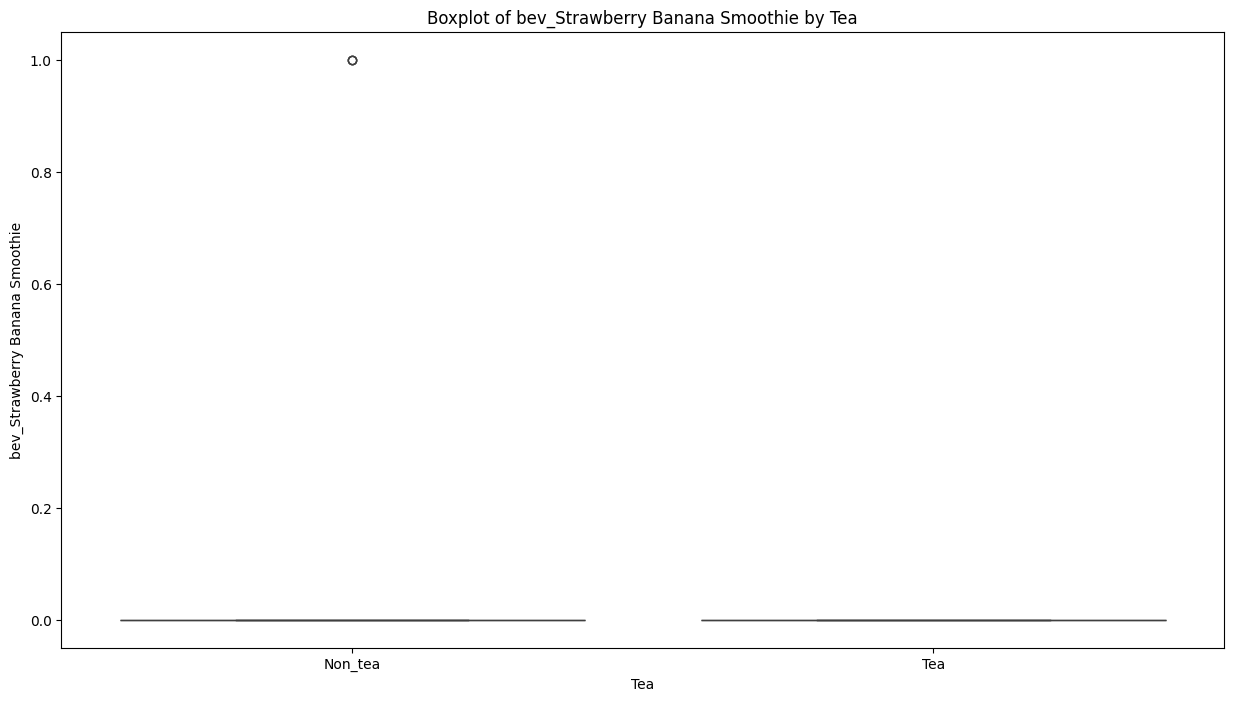

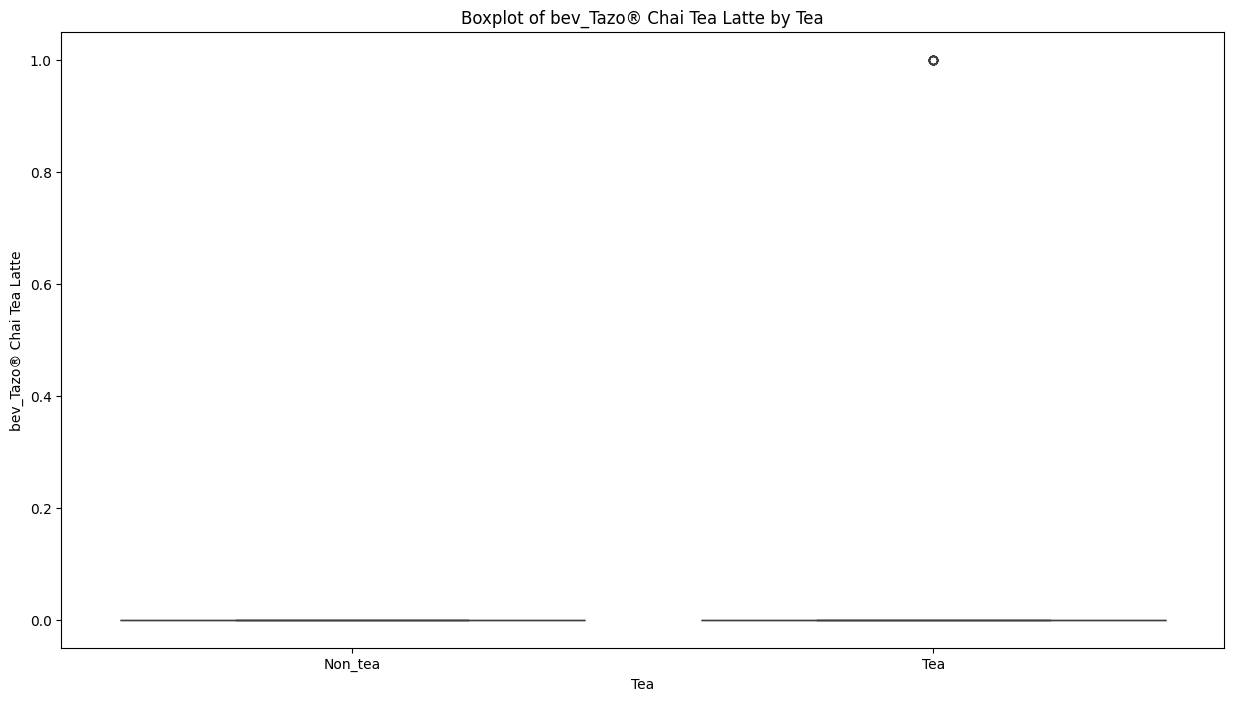

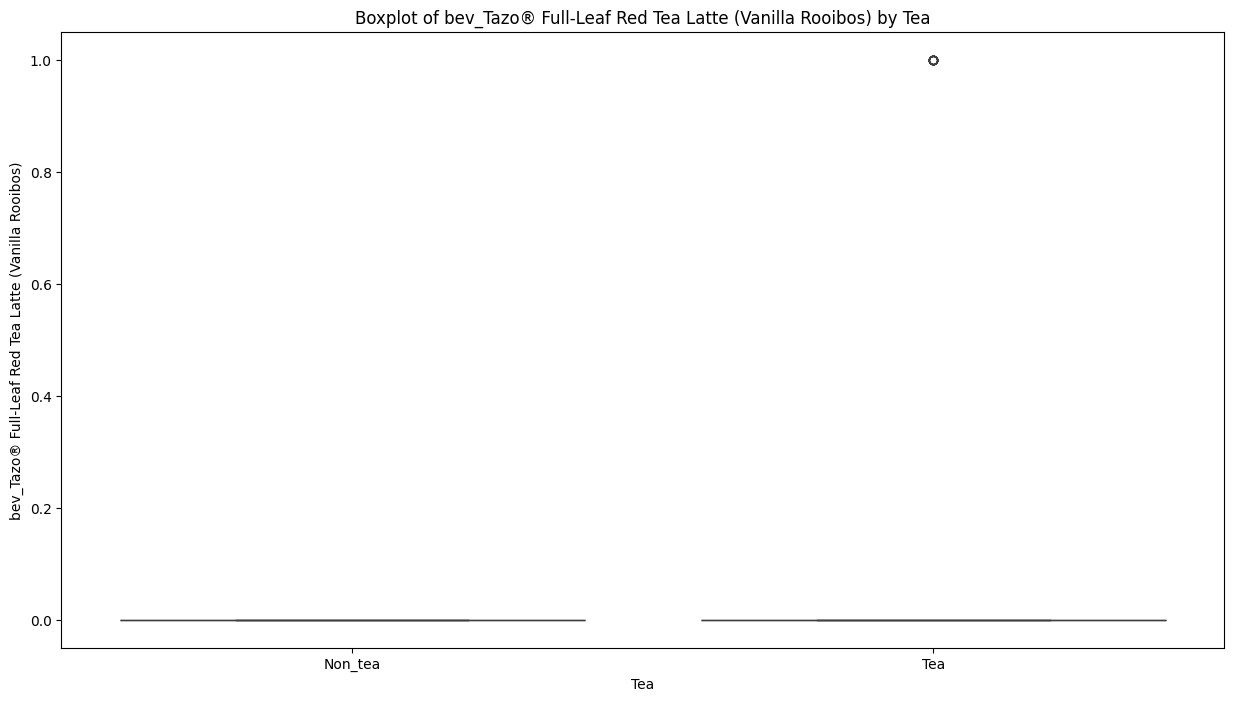

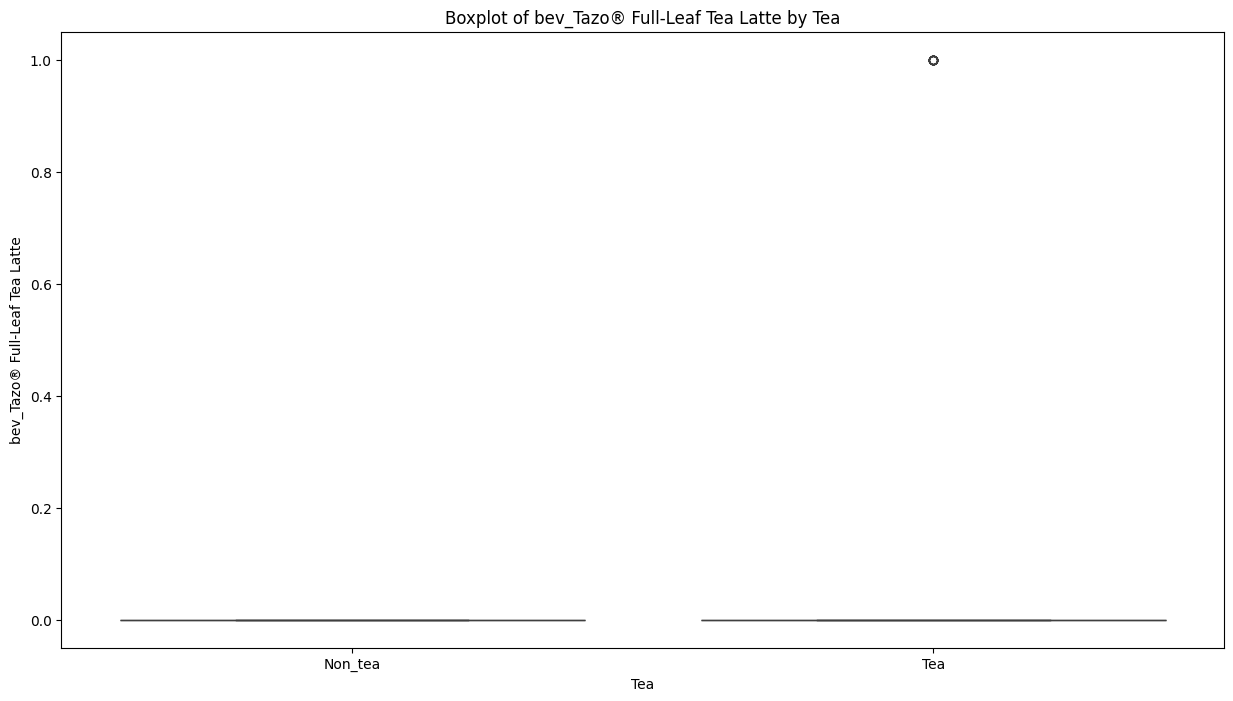

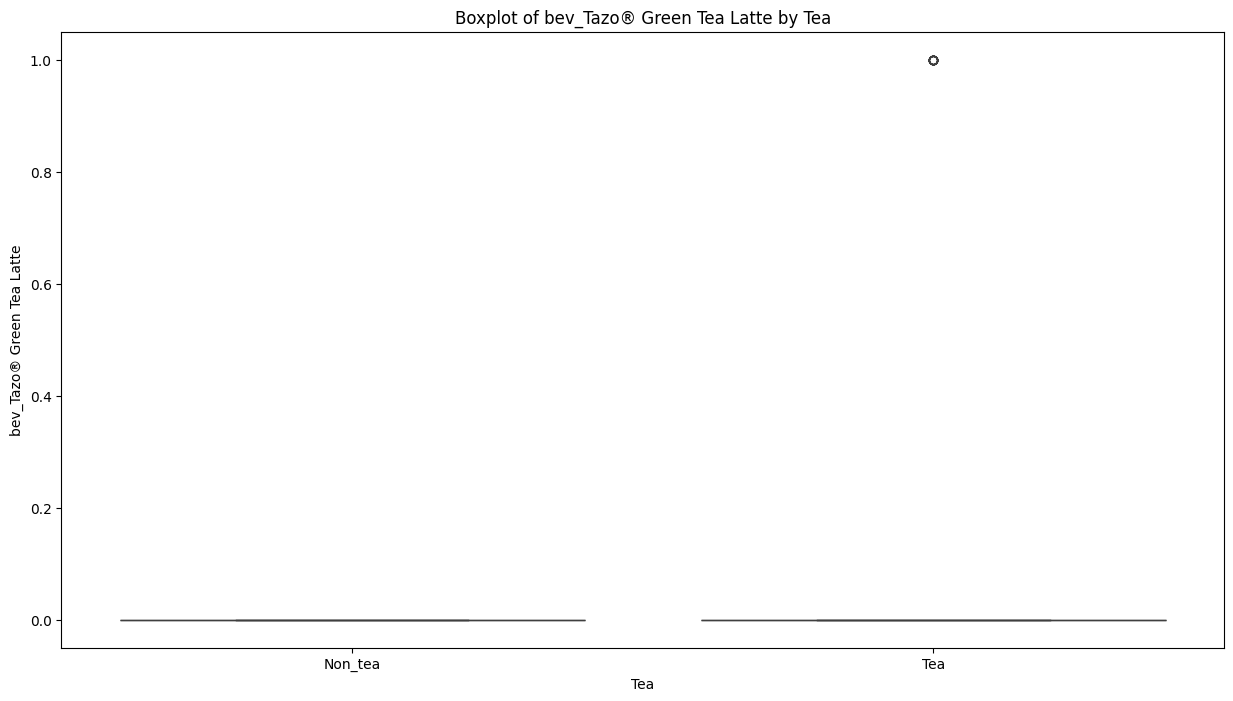

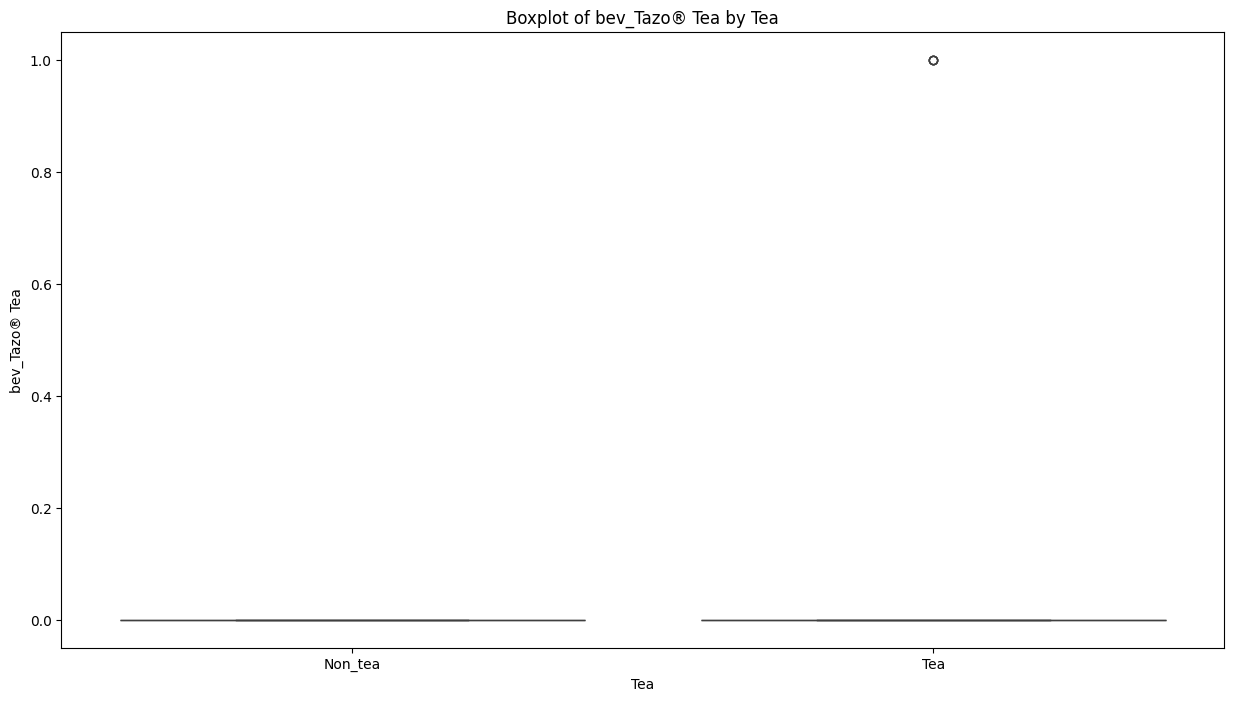

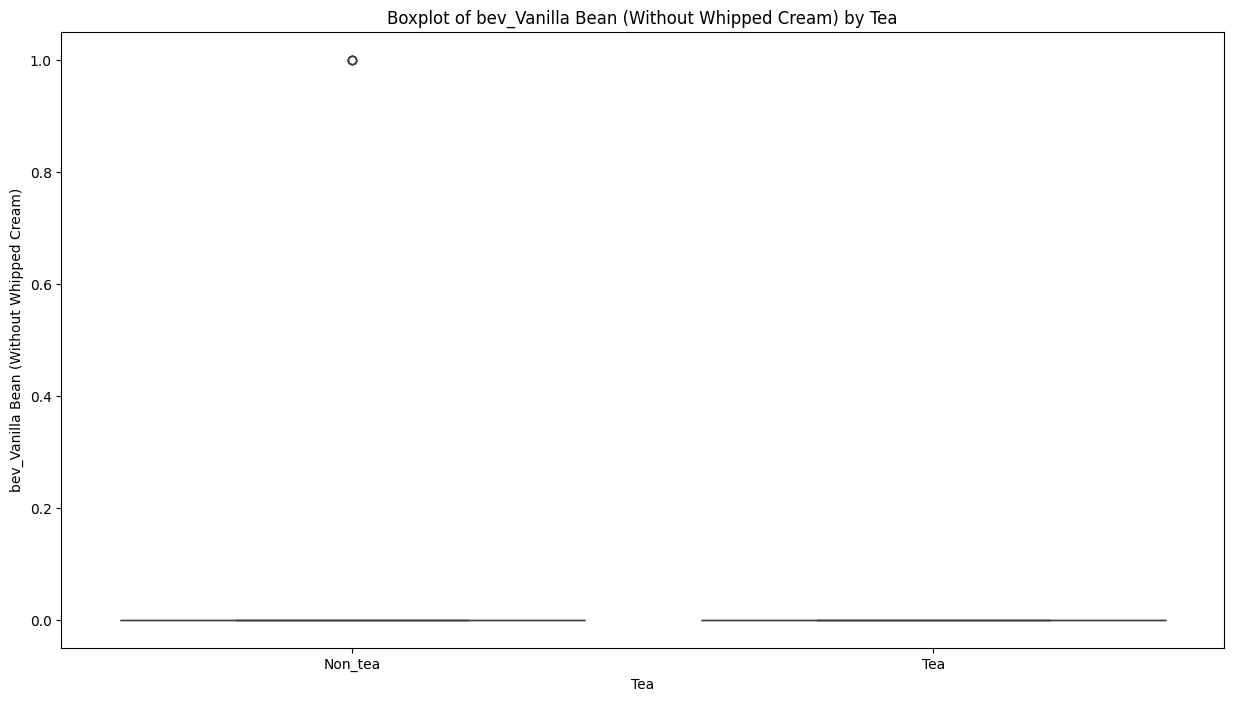

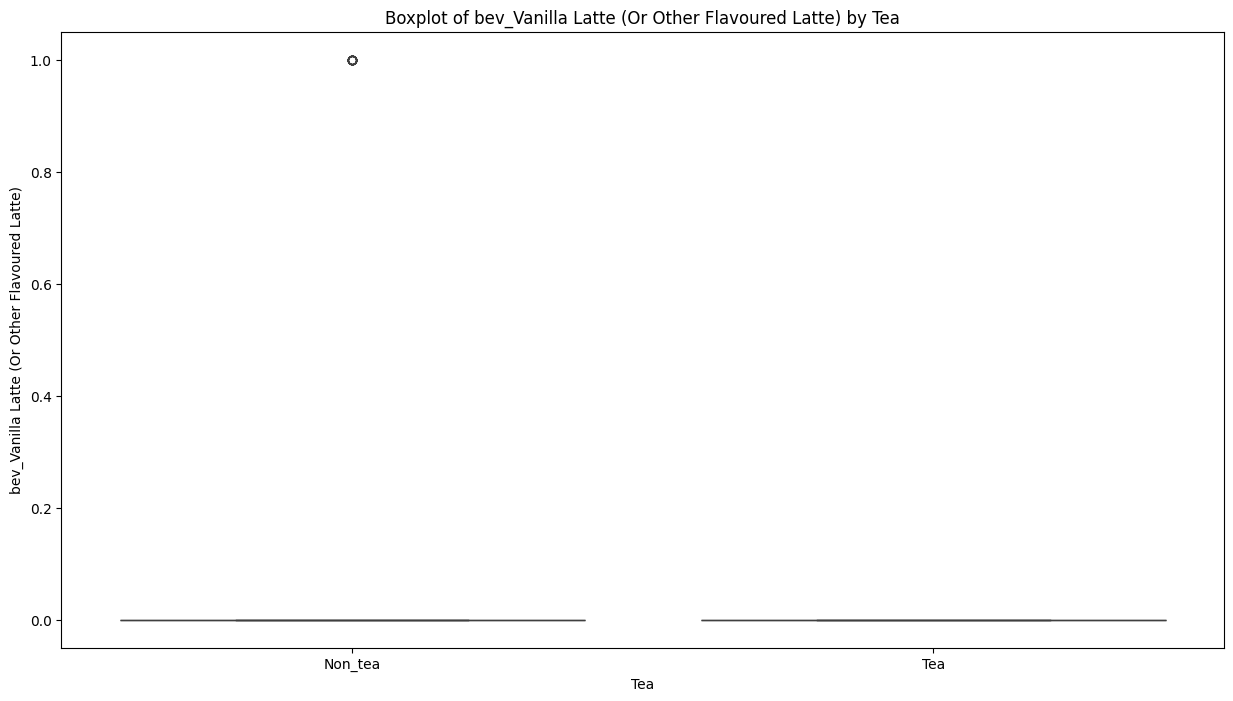

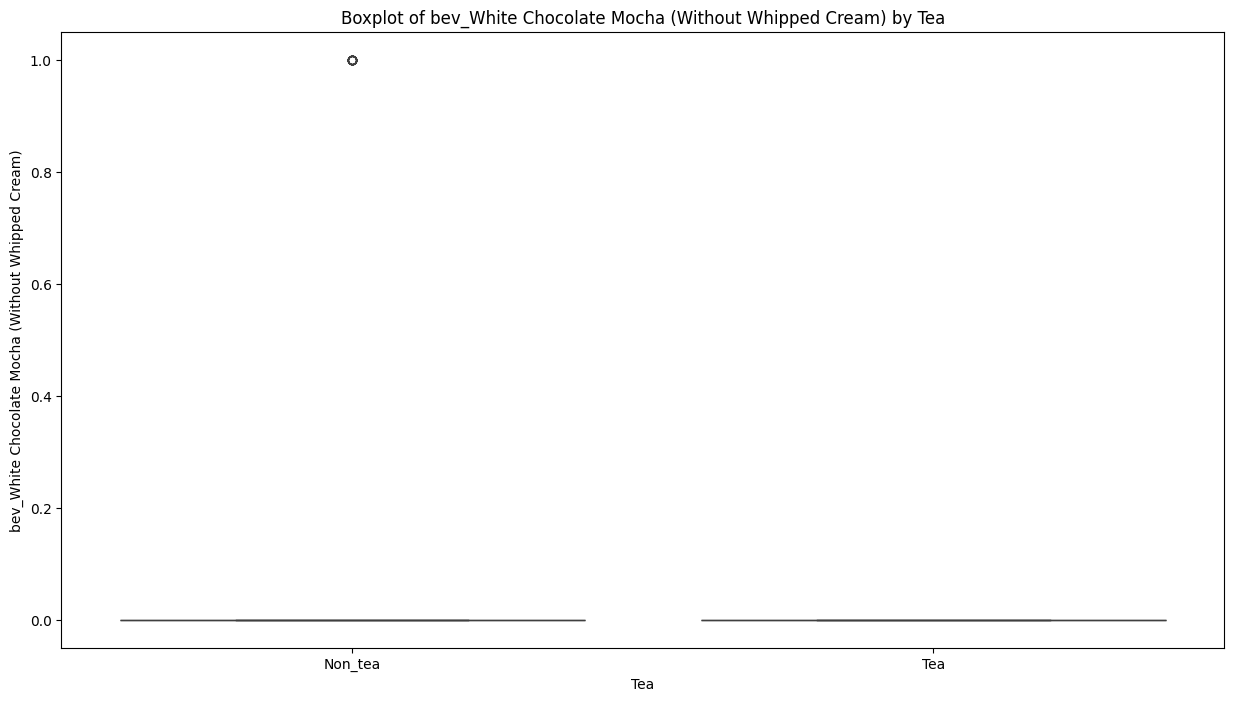

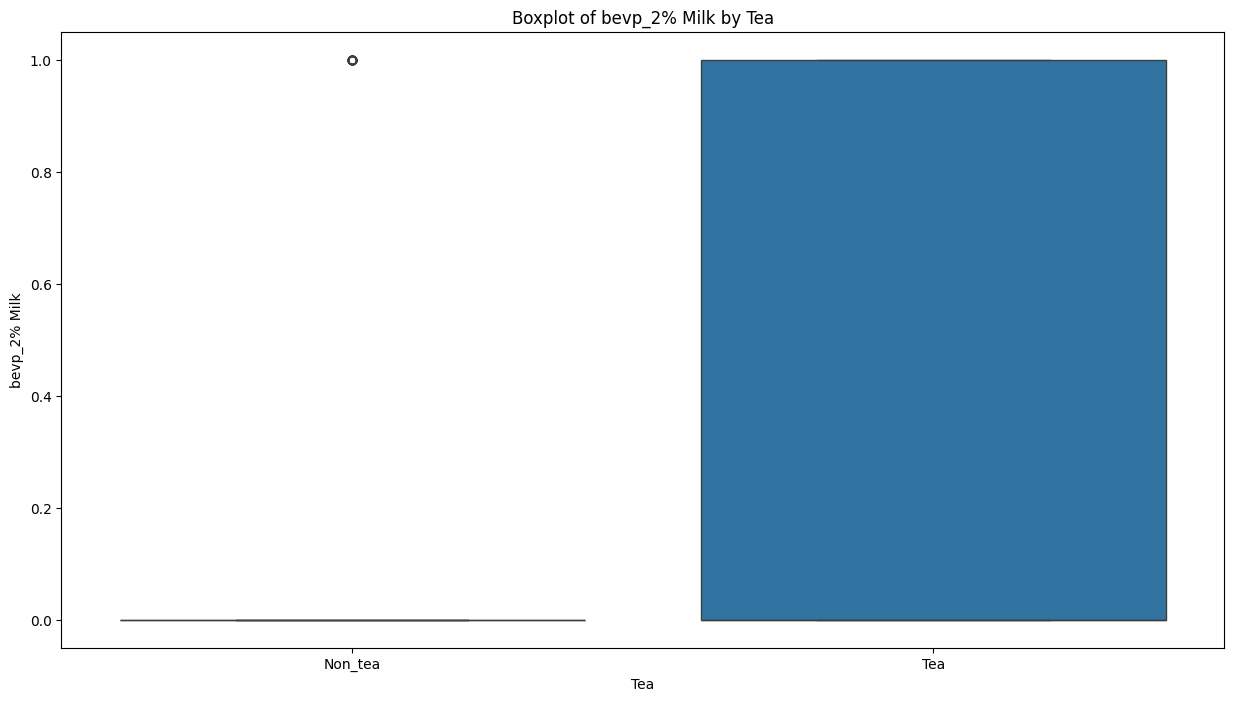

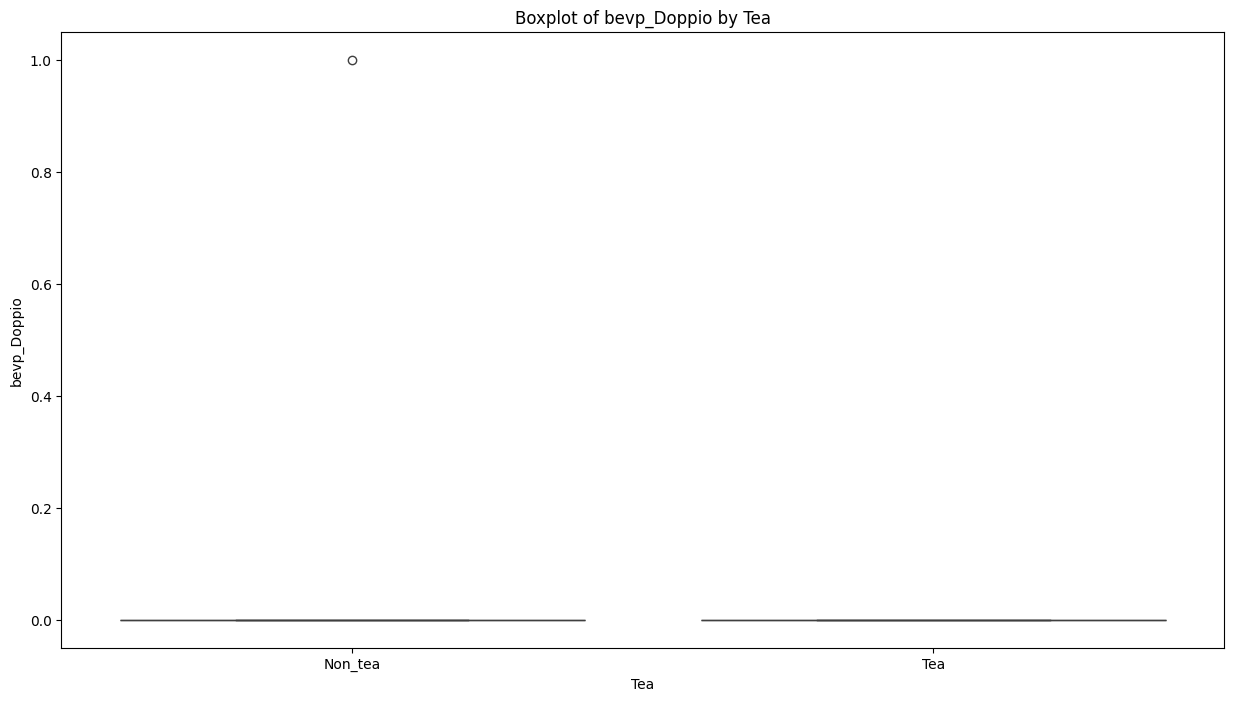

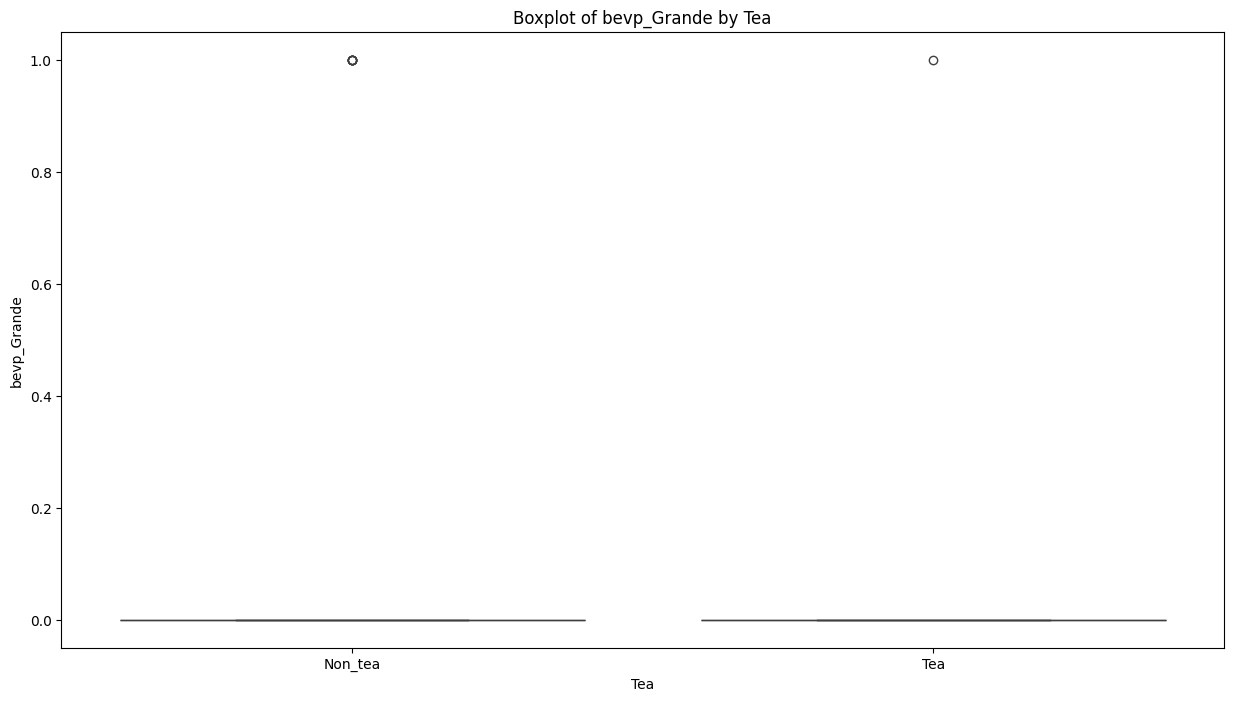

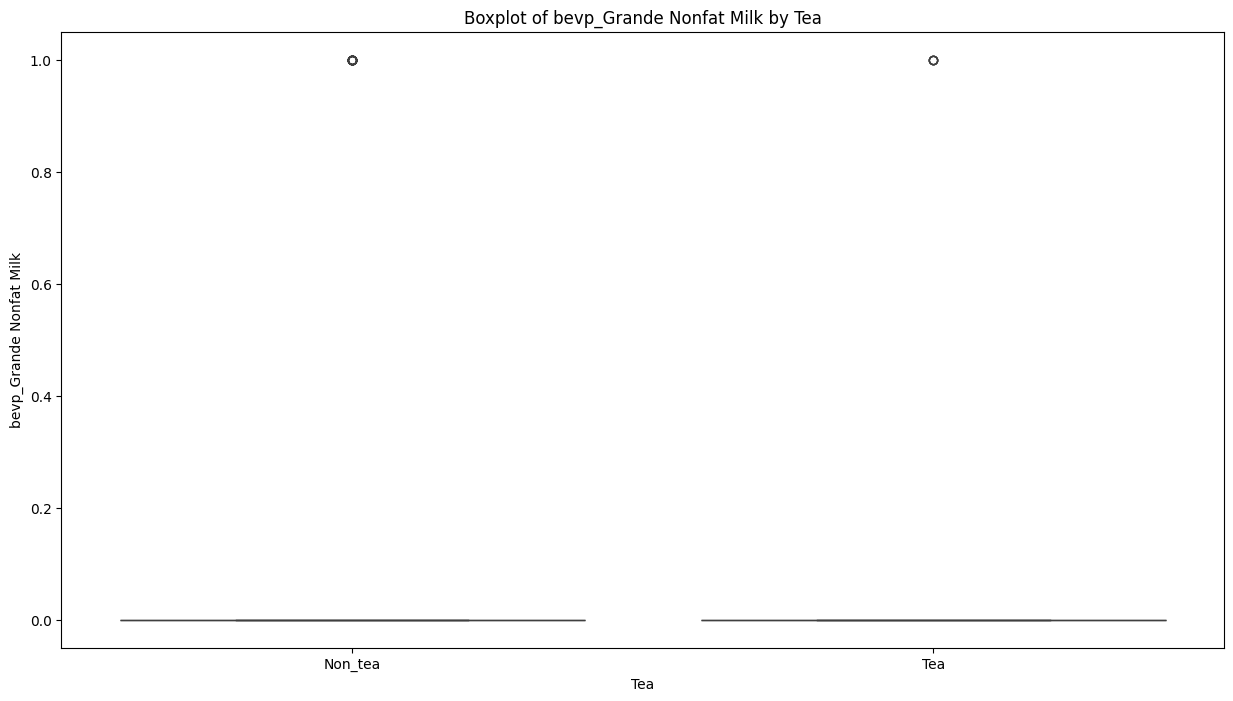

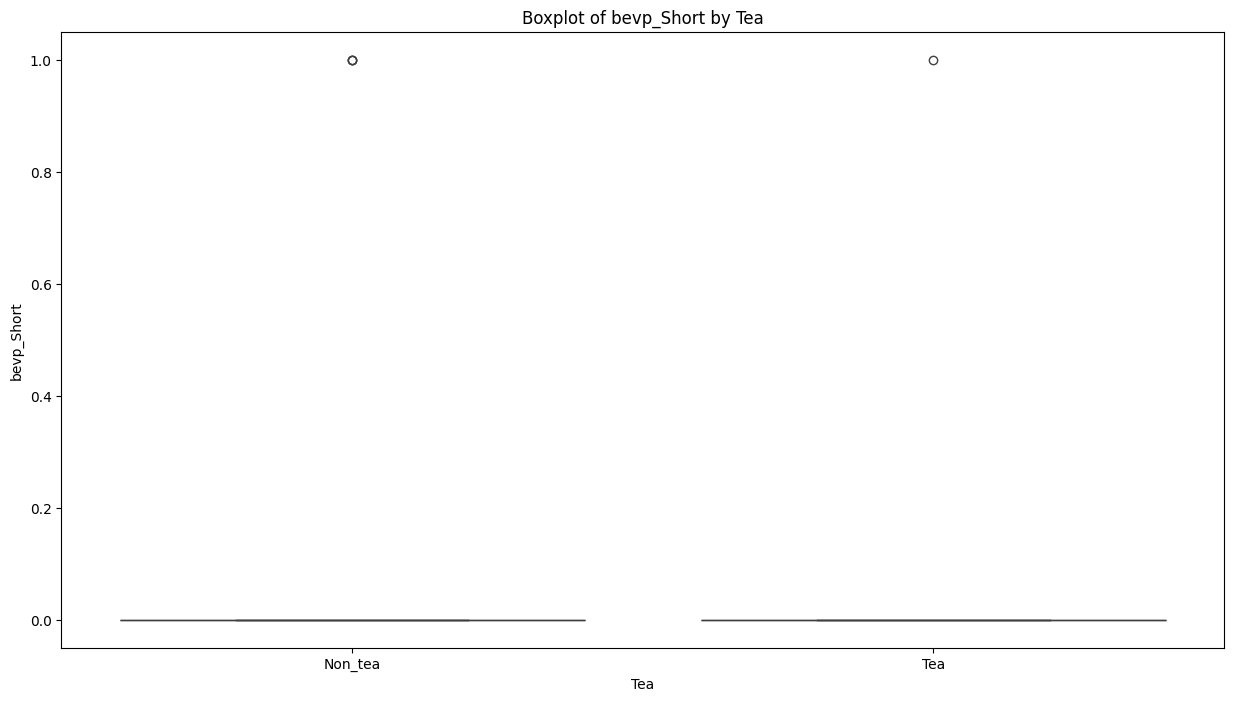

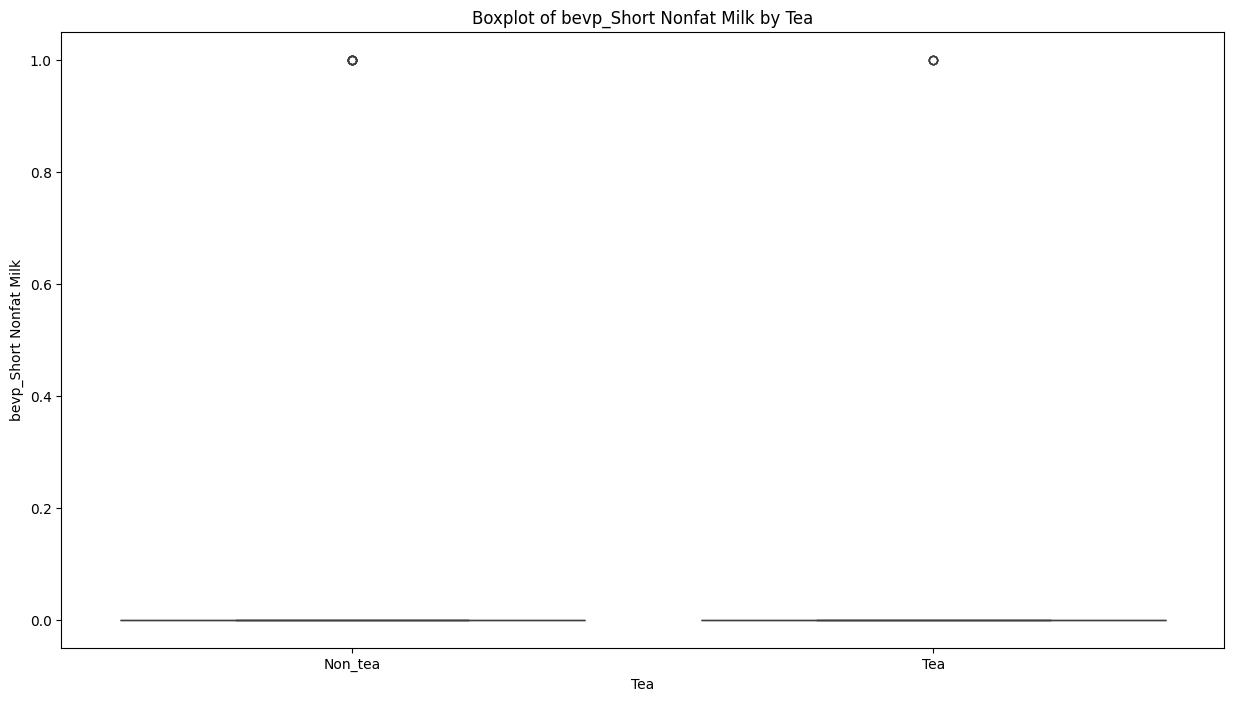

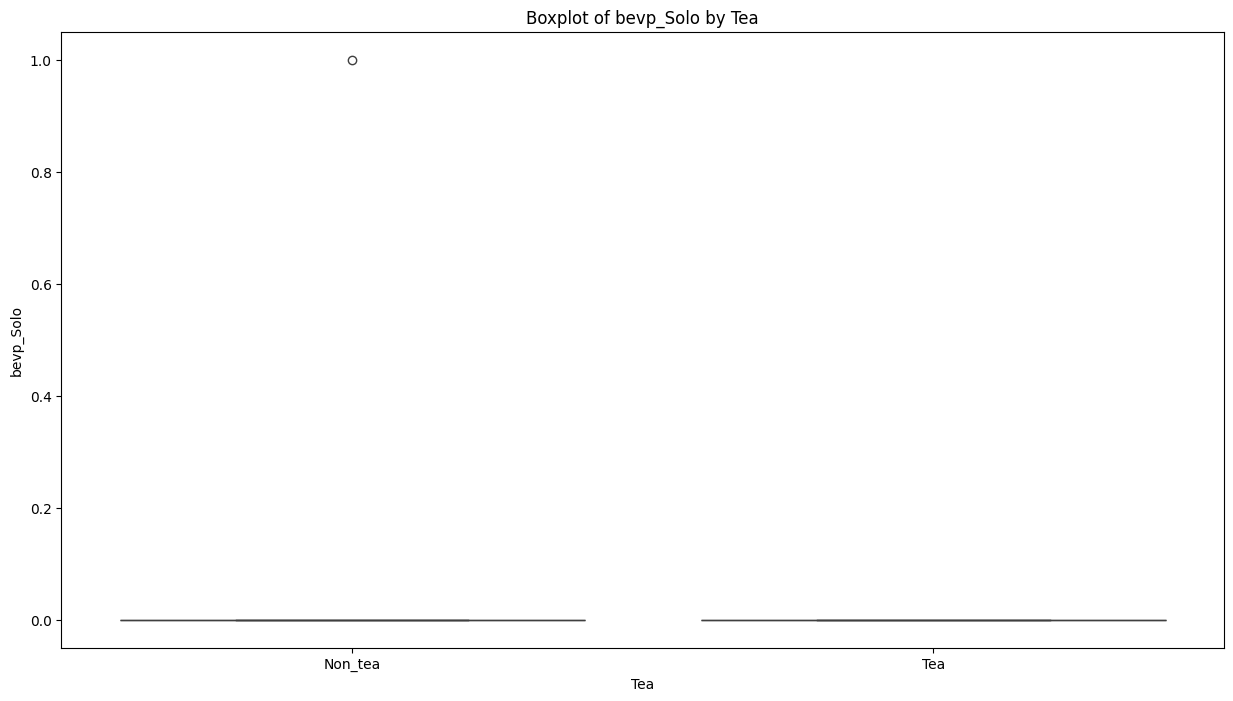

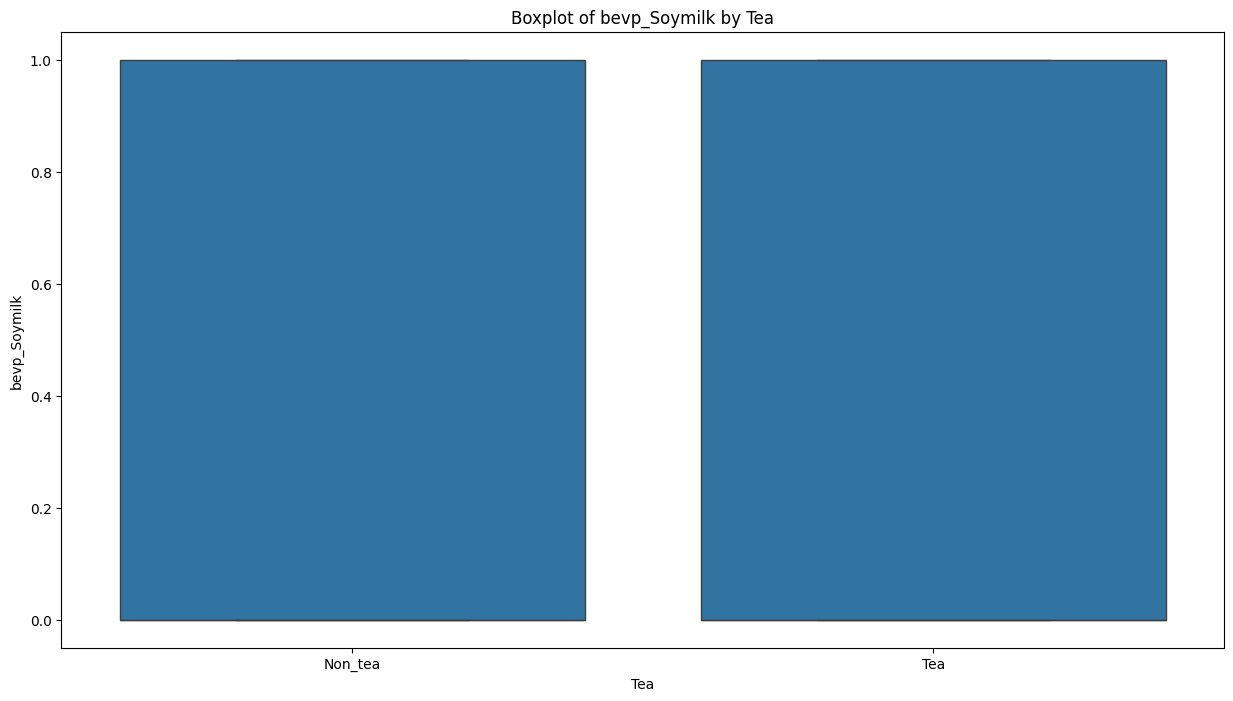

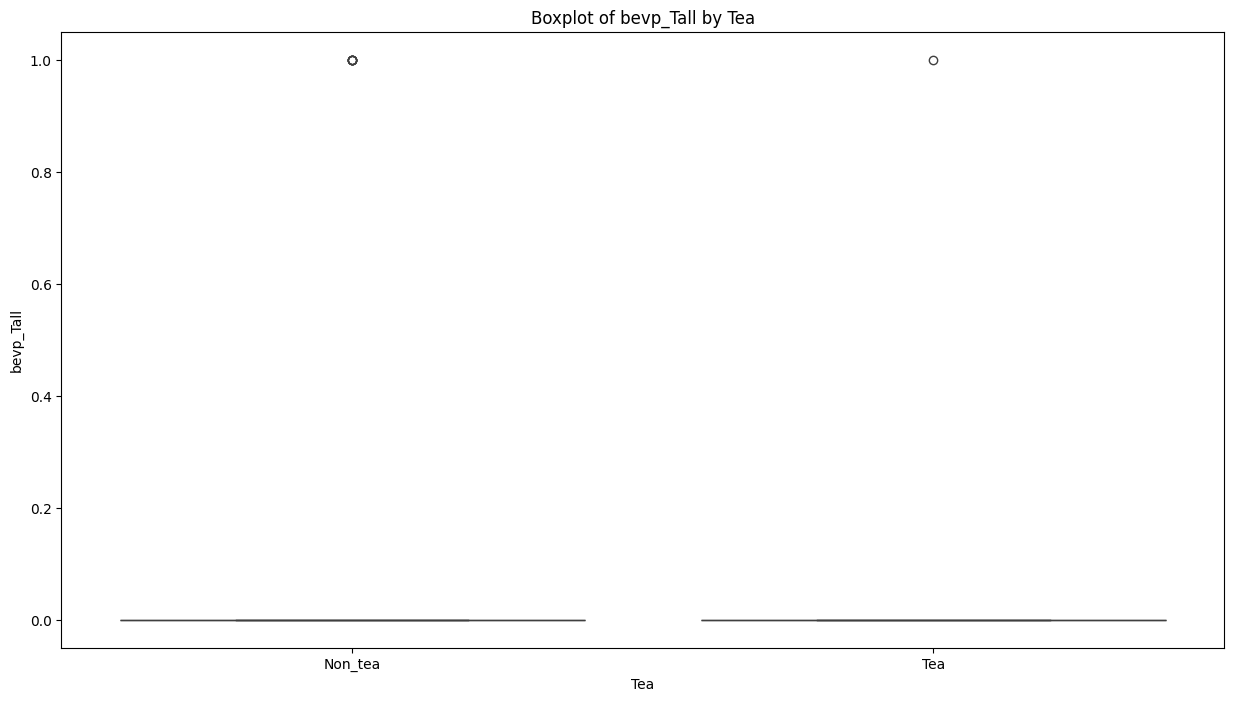

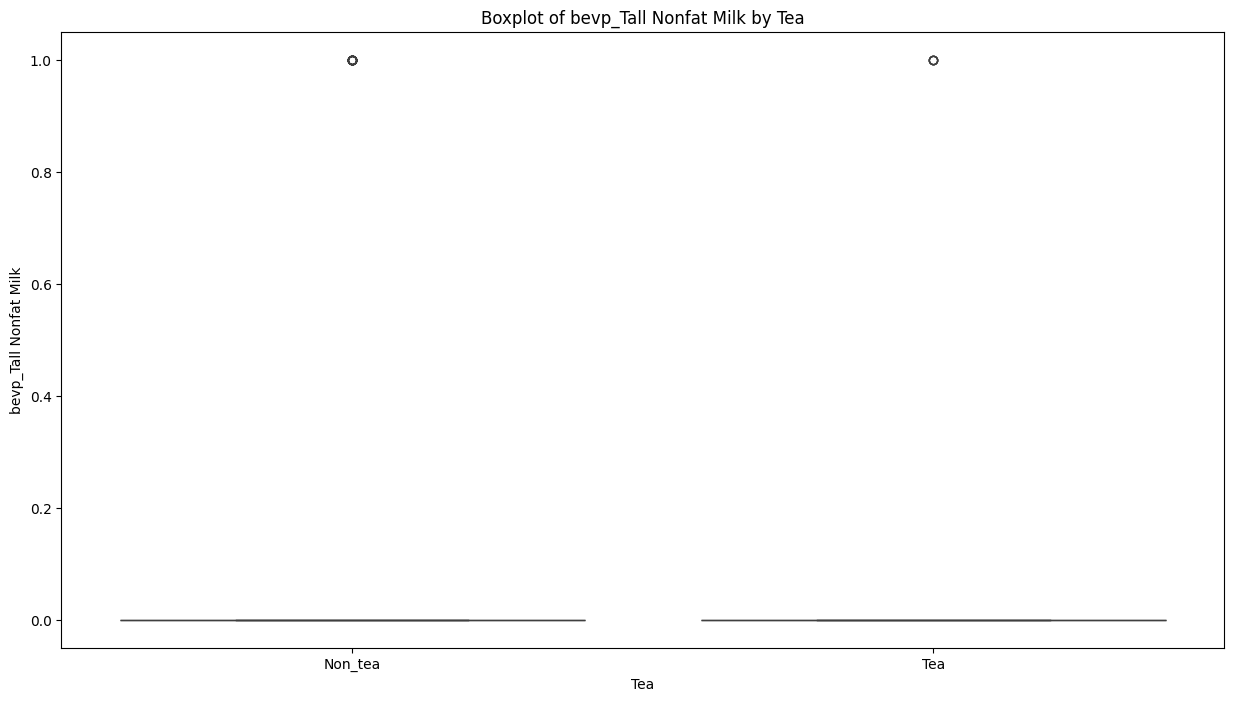

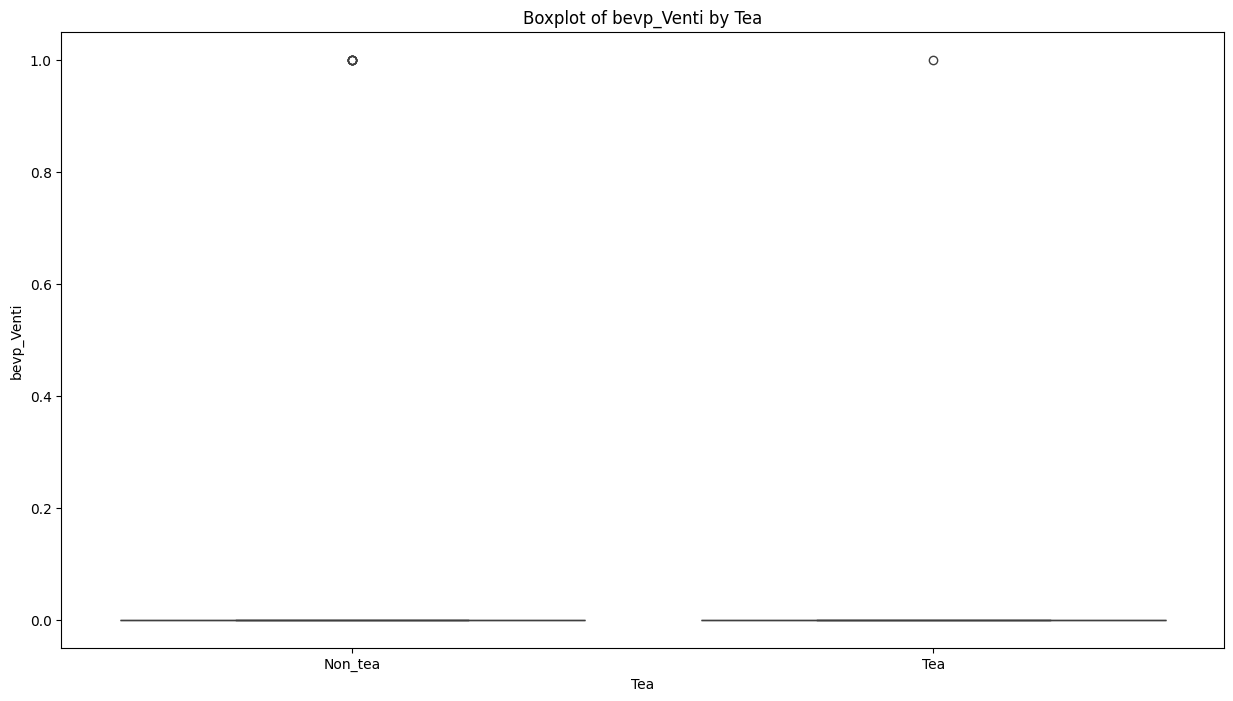

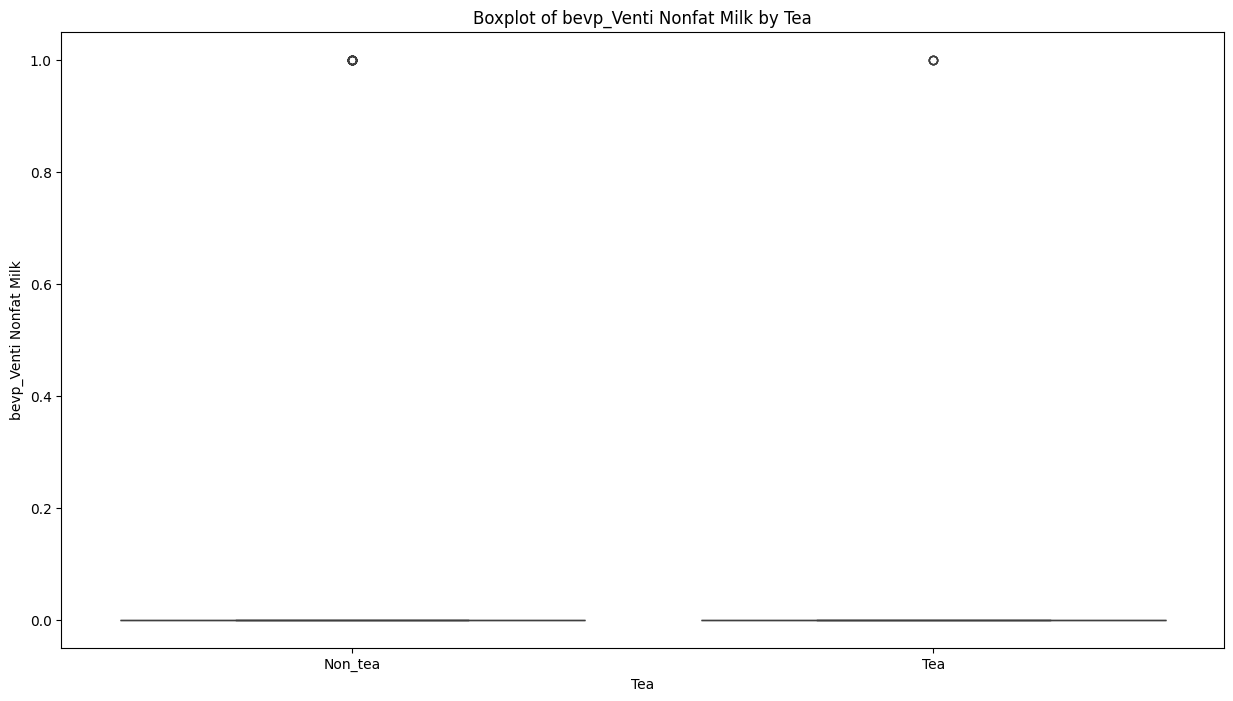

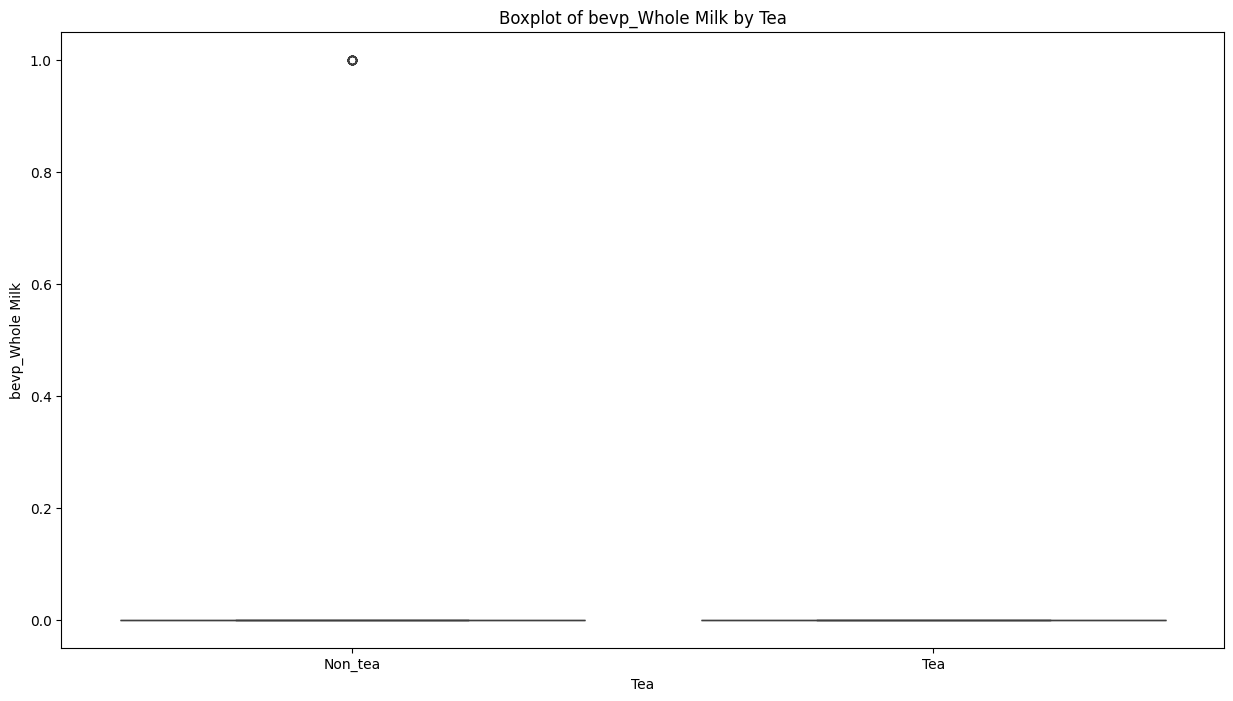

In [96]:

# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weath
# er its a tea or a non tea drink?
data['Tea']=data.Tea.replace({1:'Tea',0:'Non_tea'})
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns
for column in numeric_columns:
  plt.figure(figsize=(15,8))

  sns.boxplot(x='Tea',y=column,data=data)
  plt.title(f"Boxplot of {column} by Tea")
  plt.show()

Upon observing the boxplots,"carbohydrates","Calcium","bevp_2% milk" can be potential indicators for tea or non-tea

To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data. Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables. Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process